# Beauty and Cosmetic Product Based Recommender System

# Introduction:
In the realm of machine learning-based recommender systems, the field of cosmetics has often been overlooked. However, we firmly believe that by developing a comprehensive cosmetic recommender, we can greatly simplify the process of finding the perfect products tailored to each individual's personalized needs. Our goal is to create a one-stop shop experience where users receive recommendations for a complete makeup look based on their preferences, similar user choices, and personalized factors such as skin type, skin tone, ingredient preferences, and budget. By leveraging these insights, we aim to provide users with a curated selection of products that will enable them to achieve their desired look effortlessly. Through this project, we aspire to revolutionize the way cosmetics are recommended and empower users to make informed choices.



# Problem Statement
One of the key challenges in e-commerce is effectively matching customers with products that align with their interests especially in the beauty and cosmetics industry. While many recommender systems focus solely on the customer's current preferences, there is a wealth of information hidden in their past purchase history and reviews that can provide valuable insights into their tastes and preferences. However, existing recommender systems often overlook this historical data, limiting their ability to provide accurate and personalized recommendations. The problem at hand is to leverage the customer's past purchase history and reviews to build a recommender system that can accurately predict and suggest products that are likely to be of interest to them.

# Objectives
The primary objective of this project is to develop a robust cosmetic recommender system that offers a one-stop shop experience for users seeking beauty and cosmetics products.
* Developing an intuitive user interface that allows users to input their preferences, such as skin type, skin tone, budget, and ingredient preferences.
* Implementing collaborative filtering algorithms to analyze user data and generate personalized recommendations.
* Incorporating user feedback and refining the recommender system to improve its accuracy and effectiveness over time.
* Providing users with a curated selection of products from different categories (face, cheeks, eyes, and lips) to create a cohesive and personalized makeup look.

# Data Understanding
This dataset was collected is from kaggle and was scraped on  March 2023 and contains:

* information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
* user reviews (over 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import glob


In [2]:
class FileLoader:
    def __init__(self, filename=None):
        """
        Initialize the FileLoader object.

        Parameters:
        - filename (str): Optional. The filename of the file to load.
        """
        self.filename = filename
        self.data = None

    def load_csv(self):
        """
        Load a CSV file using the specified filename.
        """
        try:
            self.data = pd.read_csv(self.filename)
            print(f"CSV file '{self.filename}' loaded successfully!")
        except FileNotFoundError:
            print("File not found. Please provide a valid filename.")

    def load_json(self):
        """
        Load a JSON file using the specified filename.
        """
        try:
            self.data = pd.read_json(self.filename)
            print(f"JSON file loaded successfully!")
        except FileNotFoundError:
            print("File not found. Please provide a valid filename.")

    def describe(self):
        """
        Display information about the loaded data.
        """
        if self.data is not None:
            # Display the DataFrame shape
            shape = self.data.shape
            print('============================')
            print(f'DataFrame shape: {shape}\n')

            # Display the DataFrame info
            print('================================================================')
            info = self.data.info()
            print(f'DataFrame info: {info}\n')

            # Display the DataFrame description
            print('================================================================')
            description = self.data.describe()
            print(f'DataFrame description: {description}\n')

        else:
            print("No data loaded. Please load a file first using the 'load_csv' or 'load_json' methods.")

In [3]:
# #reading products data
# info =pd.read_csv('data/product_info.csv')
# info

In [4]:
# Create an instance of FileLoader
loader = FileLoader('data/product_info.csv')

# Load the CSV file
loader.load_csv()
info = loader.data

# Describe the loaded data
loader.describe()
# # Print the head of the DataFrame
info.head(2)

CSV file 'data/product_info.csv' loaded successfully!
DataFrame shape: (8494, 27)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      2

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0


## Scraped data

In [5]:
# Change the filename to 'scraped.json'
loader.filename = "data/data.json"

# Load the JSON file
loader.load_json()
scraped = loader.data

# Describe the loaded data
loader.describe()
# Print the head of the DataFrame
scraped.head(2)

JSON file loaded successfully!
DataFrame shape: (1371, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       1371 non-null   object
 1   brand        1371 non-null   object
 2   title        1371 non-null   object
 3   description  1369 non-null   object
 4   categories   1371 non-null   object
 5   options      1371 non-null   object
 6   variants     1371 non-null   object
 7   medias       1371 non-null   object
 8   stats        1371 non-null   object
dtypes: object(9)
memory usage: 96.5+ KB
DataFrame info: None

DataFrame description:                                                    source               brand  \
count                                                1371                1371   
unique                                               1371                 167   
top     {'id': 'P427419', 'crawlUrl': 'https://www.sep.

,source,brand,title,description,categories,options,variants,medias,stats
0,"{'id': 'P427419', 'crawlUrl': 'https://www.sep...",The Ordinary,Hyaluronic Acid 2% + B5 Hydrating Serum,<p><strong>Which skin type is it good for?</st...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1 oz/ 30 ...","[{'id': '2031375', 'sku': '2031375', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 4228, 'rating': 4.2114, 'loves..."
1,"{'id': 'P427417', 'crawlUrl': 'https://www.sep...",The Ordinary,Niacinamide 10% + Zinc 1% Oil Control Serum,<b>What it is: </b>A high-strength vitamin-an...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1 oz/ 30 ...","[{'id': '2031391', 'sku': '2031391', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 6185, 'rating': 4.2325, 'loves..."


In [6]:
# #reading scraped products data
# # Read the JSON file
# with open('data/data.json', 'r', encoding='utf-8') as f:
#     data = json.load(f)

# # Convert the JSON data to Pandas DataFrame
# scraped = pd.DataFrame(data)

# # Print the head of the DataFrame
# scraped.head()


In [7]:
scraped.shape

(1371, 9)

In [8]:
#create a copy of the scraped data
scraped_copy = scraped.copy()

## Cleaning scraped data

In [9]:
class ProductScraper:
    def __init__(self, data):
        self.data = data
        self.product_ids = []

    def extract_product_ids(self):
        for row in self.data['source']:
            product_id = row['id']
            self.product_ids.append(product_id)

    def add_product_ids_column(self):
        self.data['product_id'] = self.product_ids


def scrape_product_ids():
    scraper = ProductScraper(scraped_copy)
    scraper.extract_product_ids()
    scraper.add_product_ids_column()


if __name__ == '__main__':
    scrape_product_ids()


In [10]:
class CategoryExtractor:
    def __init__(self, data):
        self.data = data
        self.primary_categories = []
        self.secondary_categories = []
        self.tertiary_categories = []

    def extract_categories(self):
        for row in self.data['categories']:
            primary_category = row[0]
            secondary_category = row[1] if len(row) > 1 else None
            tertiary_category = row[-1] if len(row) > 2 else None

            self.primary_categories.append(primary_category)
            self.secondary_categories.append(secondary_category)
            self.tertiary_categories.append(tertiary_category)

    def add_category_columns(self):
        self.data['primary_category'] = self.primary_categories
        self.data['secondary_category'] = self.secondary_categories
        self.data['tertiary_category'] = self.tertiary_categories


def extract_and_add_categories():
    category_extractor = CategoryExtractor(scraped_copy)
    category_extractor.extract_categories()
    category_extractor.add_category_columns()


if __name__ == '__main__':
    extract_and_add_categories()


In [11]:
class StatsExtractor:
    def __init__(self, data):
        self.data = data
        self.ratings = []
        self.loves_counts = []
        self.reviews = []

    def extract_stats(self):
        for row in self.data['stats']:
            rating = row['rating']
            loves_count = row['lovesCount']
            review_count = row['reviewCount']

            self.ratings.append(rating)
            self.loves_counts.append(loves_count)
            self.reviews.append(review_count)

    def add_stats_columns(self):
        self.data['rating'] = self.ratings
        self.data['loves_count'] = self.loves_counts
        self.data['reviews'] = self.reviews


def extract_and_add_stats():
    stats_extractor = StatsExtractor(scraped_copy)
    stats_extractor.extract_stats()
    stats_extractor.add_stats_columns()


if __name__ == '__main__':
    extract_and_add_stats()


In [12]:
class PriceExtractor:
    def __init__(self, data):
        self.data = data
        self.prices = []

    def extract_prices(self):
        for row in self.data['variants']:
            price = None
            for variant in row:
                if 'price' in variant and 'current' in variant['price']:
                    price = variant['price']['current']
                    break
            self.prices.append(price)

    def add_price_column(self):
        self.data['price_usd'] = self.prices



def extract_and_add_prices():
    price_extractor = PriceExtractor(scraped_copy)
    price_extractor.extract_prices()
    price_extractor.add_price_column()


if __name__ == '__main__':
    extract_and_add_prices()


In [13]:
class SizeExtractor:
    def __init__(self, data):
        self.data = data
        self.sizes = []

    def extract_sizes(self):
        for row in self.data['variants']:
            size = None
            for variant in row:
                if 'options' in variant:
                    options = variant['options']
                    if isinstance(options, list) and len(options) > 0:
                        size = options[0]
                        break
            self.sizes.append(size)

    def add_size_column(self):
        self.data['size'] = self.sizes


def extract_and_add_sizes():
    size_extractor = SizeExtractor(scraped_copy)
    size_extractor.extract_sizes()
    size_extractor.add_size_column()


if __name__ == '__main__':
    extract_and_add_sizes()


In [14]:
scraped_copy.head()

,source,brand,title,description,categories,options,variants,medias,stats,product_id,primary_category,secondary_category,tertiary_category,rating,loves_count,reviews,price_usd,size
0,"{'id': 'P427419', 'crawlUrl': 'https://www.sep...",The Ordinary,Hyaluronic Acid 2% + B5 Hydrating Serum,<p><strong>Which skin type is it good for?</st...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1 oz/ 30 ...","[{'id': '2031375', 'sku': '2031375', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 4228, 'rating': 4.2114, 'loves...",P427419,Skincare,Treatments,Face Serums,4.2114,829334,4228,890,1 oz/ 30 mL
1,"{'id': 'P427417', 'crawlUrl': 'https://www.sep...",The Ordinary,Niacinamide 10% + Zinc 1% Oil Control Serum,<b>What it is: </b>A high-strength vitamin-an...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1 oz/ 30 ...","[{'id': '2031391', 'sku': '2031391', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 6185, 'rating': 4.2325, 'loves...",P427417,Skincare,Treatments,Face Serums,4.2325,842841,6185,600,1 oz/ 30 mL
2,"{'id': 'P458219', 'crawlUrl': 'https://www.sep...",Glow Recipe,Watermelon Glow PHA + BHA Pore-Tight Toner,"<p><strong>What it is: </strong>A bestselling,...","[Skincare, Cleansers, Toners]","[{'type': 'Size', 'values': [{'id': '1.35 oz/ ...","[{'id': '2421519', 'sku': '2421519', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 3858, 'rating': 4.3362, 'loves...",P458219,Skincare,Cleansers,Toners,4.3362,359228,3858,1500,1.35 oz/ 40 mL
3,"{'id': 'P466123', 'crawlUrl': 'https://www.sep...",Glow Recipe,Watermelon Glow Niacinamide Dew Drops Serum,<p><strong>What it is: </strong>A breakthrough...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1.35 oz/ ...","[{'id': '2404846', 'sku': '2404846', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 2755, 'rating': 4.376, 'lovesC...",P466123,Skincare,Treatments,Face Serums,4.3760,500758,2755,3500,1.35 oz/ 40 mL
4,"{'id': 'P432668', 'crawlUrl': 'https://www.sep...",Drunk Elephant,D-Bronzi™ Anti-Pollution Bronzing Drops with P...,<p><strong>What it is: </strong>A serum that d...,"[Skincare, Treatments, Face Serums]","[{'type': 'Size', 'values': [{'id': '1.69 oz/ ...","[{'id': '2025633', 'sku': '2025633', 'price': ...","[{'type': 'Image', 'url': 'https://www.sephora...","{'reviewCount': 2306, 'rating': 4.3591, 'loves...",P432668,Skincare,Treatments,Face Serums,4.3591,439477,2306,6800,1.69 oz/ 50 mL


In [15]:
scraped_copy.shape

(1371, 18)

In [16]:
#reading reviews data
review_1  =pd.read_csv('data/reviews_0_250.csv', low_memory=False)
review_2 =pd.read_csv('data/reviews_250_500.csv', low_memory=False)
review_3 =pd.read_csv("data/reviews_500_750.csv", low_memory=False)
review_4 =pd.read_csv("data/reviews_750_1000.csv", low_memory=False)
review_5 =pd.read_csv("data/reviews_1000_1500.csv", low_memory=False)
review_6 =pd.read_csv("data/reviews_1500_end.csv", low_memory=False)

In [17]:
# Concatenate all the review DataFrames
merged_reviews = pd.concat([review_1, review_2, review_3, review_4, review_5, review_6])

# Reset the index of the merged DataFrame
merged_reviews = merged_reviews.reset_index(drop=True)

# Print the merged DataFrame
merged_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [18]:
merged_reviews.shape

(1301136, 19)

## Final data

In [19]:
# Concatenate all the products DataFrames
products_df = pd.concat([info, scraped])

# Reset the index of the merged DataFrame
products_df = products_df.reset_index(drop=True)

# Print the merged DataFrame
products_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,child_min_price,source,brand,title,description,categories,options,variants,medias,stats
0,P473671,Fragrance Discovery Set,6342.0,19-69,6320.0,3.6364,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342.0,19-69,3827.0,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P473662,Rainbow Bar Eau de Parfum,6342.0,19-69,3253.0,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P473660,Kasbah Eau de Parfum,6342.0,19-69,3018.0,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P473658,Purple Haze Eau de Parfum,6342.0,19-69,2691.0,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
products_df.shape

(9865, 36)

In [21]:
# import display that can display maximum columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [22]:
"""Function to merge all products and users information data"""
def merge_dataframe(data_0, data_1, merge_column):
    """A function to merge the datasets based on a given column"""
    new_df = data_0.merge(data_1, on=merge_column)
    return new_df

df = merge_dataframe(products_df, merged_reviews, "product_id")
df

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_x,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd_x,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,source,brand,title,description,categories,options,variants,medias,stats,Unnamed: 0,author_id,rating_y,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_y,brand_name_y,price_usd_y
0,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556982,5880814443,5,1.0,1.000000,2,0,2,2023-02-09,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
1,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556983,1726924575,5,1.0,0.333333,3,2,1,2023-01-13,This cream feels so silky and luxurious! I fee...,Luxurious treat I use nightly.,NaN,NaN,NaN,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
2,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556984,1551348158,5,1.0,1.000000,5,0,5,2022-12-09,This is the fourth Algenist product I’ve gotte...,Algenist doesn't miss,NaN,NaN,combination,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
3,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556985,8222942765,5,1.0,0.800000,5,1,4,2022-12-01,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
4,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556986,2403670662,2,0.0,0.111111,9,8,1,2022-11-07,I don’t like the smell. It pills on your skin ...,NaN,fair,green,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301131,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169.0,Youth To The People,13592.0,4.2500,4.0,NaN,NaN,NaN,NaN,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",20.0,22.0,NaN,1.0,0.0,0.0,0.0,0.0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49576,37100655841,3,1.0,1.000000,1,0,1,2023-01-24,"I loved the clean

In [23]:
df.shape


(1301136, 54)

In [24]:
data =df.copy()
data

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_x,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd_x,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,source,brand,title,description,categories,options,variants,medias,stats,Unnamed: 0,author_id,rating_y,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_y,brand_name_y,price_usd_y
0,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556982,5880814443,5,1.0,1.000000,2,0,2,2023-02-09,"Ever since I bought this, I noticed that my sk...",Must have,medium,brown,oily,black,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
1,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556983,1726924575,5,1.0,0.333333,3,2,1,2023-01-13,This cream feels so silky and luxurious! I fee...,Luxurious treat I use nightly.,NaN,NaN,NaN,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
2,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556984,1551348158,5,1.0,1.000000,5,0,5,2022-12-09,This is the fourth Algenist product I’ve gotte...,Algenist doesn't miss,NaN,NaN,combination,NaN,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
3,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556985,8222942765,5,1.0,0.800000,5,1,4,2022-12-01,I’ve been using this for 2 months now and I ca...,Incredible Collagen Sleeping Moisturizer! Luxury!,light,brown,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
4,P439055,GENIUS Sleeping Collagen Moisturizer,6018.0,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,NaN,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,556986,2403670662,2,0.0,0.111111,9,8,1,2022-11-07,I don’t like the smell. It pills on your skin ...,NaN,fair,green,combination,blonde,GENIUS Sleeping Collagen Moisturizer,Algenist,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301131,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169.0,Youth To The People,13592.0,4.2500,4.0,NaN,NaN,NaN,NaN,"['Superfood Antioxidant Cleanser:', 'Water/Aqu...",20.0,22.0,NaN,1.0,0.0,0.0,0.0,0.0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49576,37100655841,3,1.0,1.000000,1,0,1,2023-01-24,"I loved the clean

In [25]:
new_data = data[['author_id', 'product_id', 'product_name_x', 'brand_name_x',
       'loves_count', 'rating_x', 'reviews', 'size',
       'ingredients', 'price_usd_x', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category',
       'is_recommended', 'helpfulness', 'review_text',
        'skin_tone', 'eye_color', 'skin_type', 'hair_color',
        ]]
new_data.head()

,author_id,product_id,product_name_x,brand_name_x,loves_count,rating_x,reviews,size,ingredients,price_usd_x,highlights,primary_category,secondary_category,tertiary_category,is_recommended,helpfulness,review_text,skin_tone,eye_color,skin_type,hair_color
0,5880814443,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,1.0,1.000000,"Ever since I bought this, I noticed that my sk...",medium,brown,oily,black
1,1726924575,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,1.0,0.333333,This cream feels so silky and luxurious! I fee...,NaN,NaN,NaN,NaN
2,1551348158,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,1.0,1.000000,This is the fourth Algenist product I’ve gotte...,NaN,NaN,combination,NaN
3,8222942765,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,1.0,0.800000,I’ve been using this for 2 months now and I ca...,light,brown,combination,blonde
4,2403670662,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,33910.0,4.5413,1321.0,2 oz/ 60 mL,"['Collagen (Vegan)*, Water (Aqua, Eau), Ethylh...",98.0,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0.0,0.111111,I don’t like the smell. It pills on your skin ...,fair,green,combination,blonde


In [26]:
new_data.shape

(1301136, 21)

In [27]:
 #from pandas_profiling import ProfileReport

In [28]:

#profile_info = ProfileReport(new_data)
#profile_info

# Data Cleaning

## Duplicates

In [29]:
duplicates = []
def check_duplicates(data):
    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The Dataset has No Duplicates')
    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')



In [30]:
check_duplicates(new_data)

Duplicated rows constitute of 15.91 % of our dataset


# Missing Values

In [31]:
"""Checking missing values"""
def missing_values(data):
    #identify missing values per columns
    miss = data.isna().sum()
    #calculate percentage of missing values per columns
    percentage = (data.isna().sum()/len(data)).round(4)
    #create a dataframe
    return pd.DataFrame({'Missing values':miss, 'Percentage':percentage})
missing_values(new_data)

,Missing values,Percentage
author_id,0,0.0000
product_id,0,0.0000
product_name_x,0,0.0000
brand_name_x,0,0.0000
loves_count,0,0.0000
rating_x,0,0.0000
reviews,0,0.0000
size,49459,0.0380
ingredients,25177,0.0194
price_usd_x,0,0.0000


# Outliers

In [32]:
numerical_columns = new_data[['loves_count', 'rating_x','reviews', 'price_usd_x', 'is_recommended',
                              'helpfulness']]
categorical_columns =new_data.select_dtypes(exclude = "number")

In [33]:
"""Function to check for outliers"""
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
    axes = axes.flatten()  # Convert axes array to 1D

    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
       # print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.tight_layout()
    plt.show()

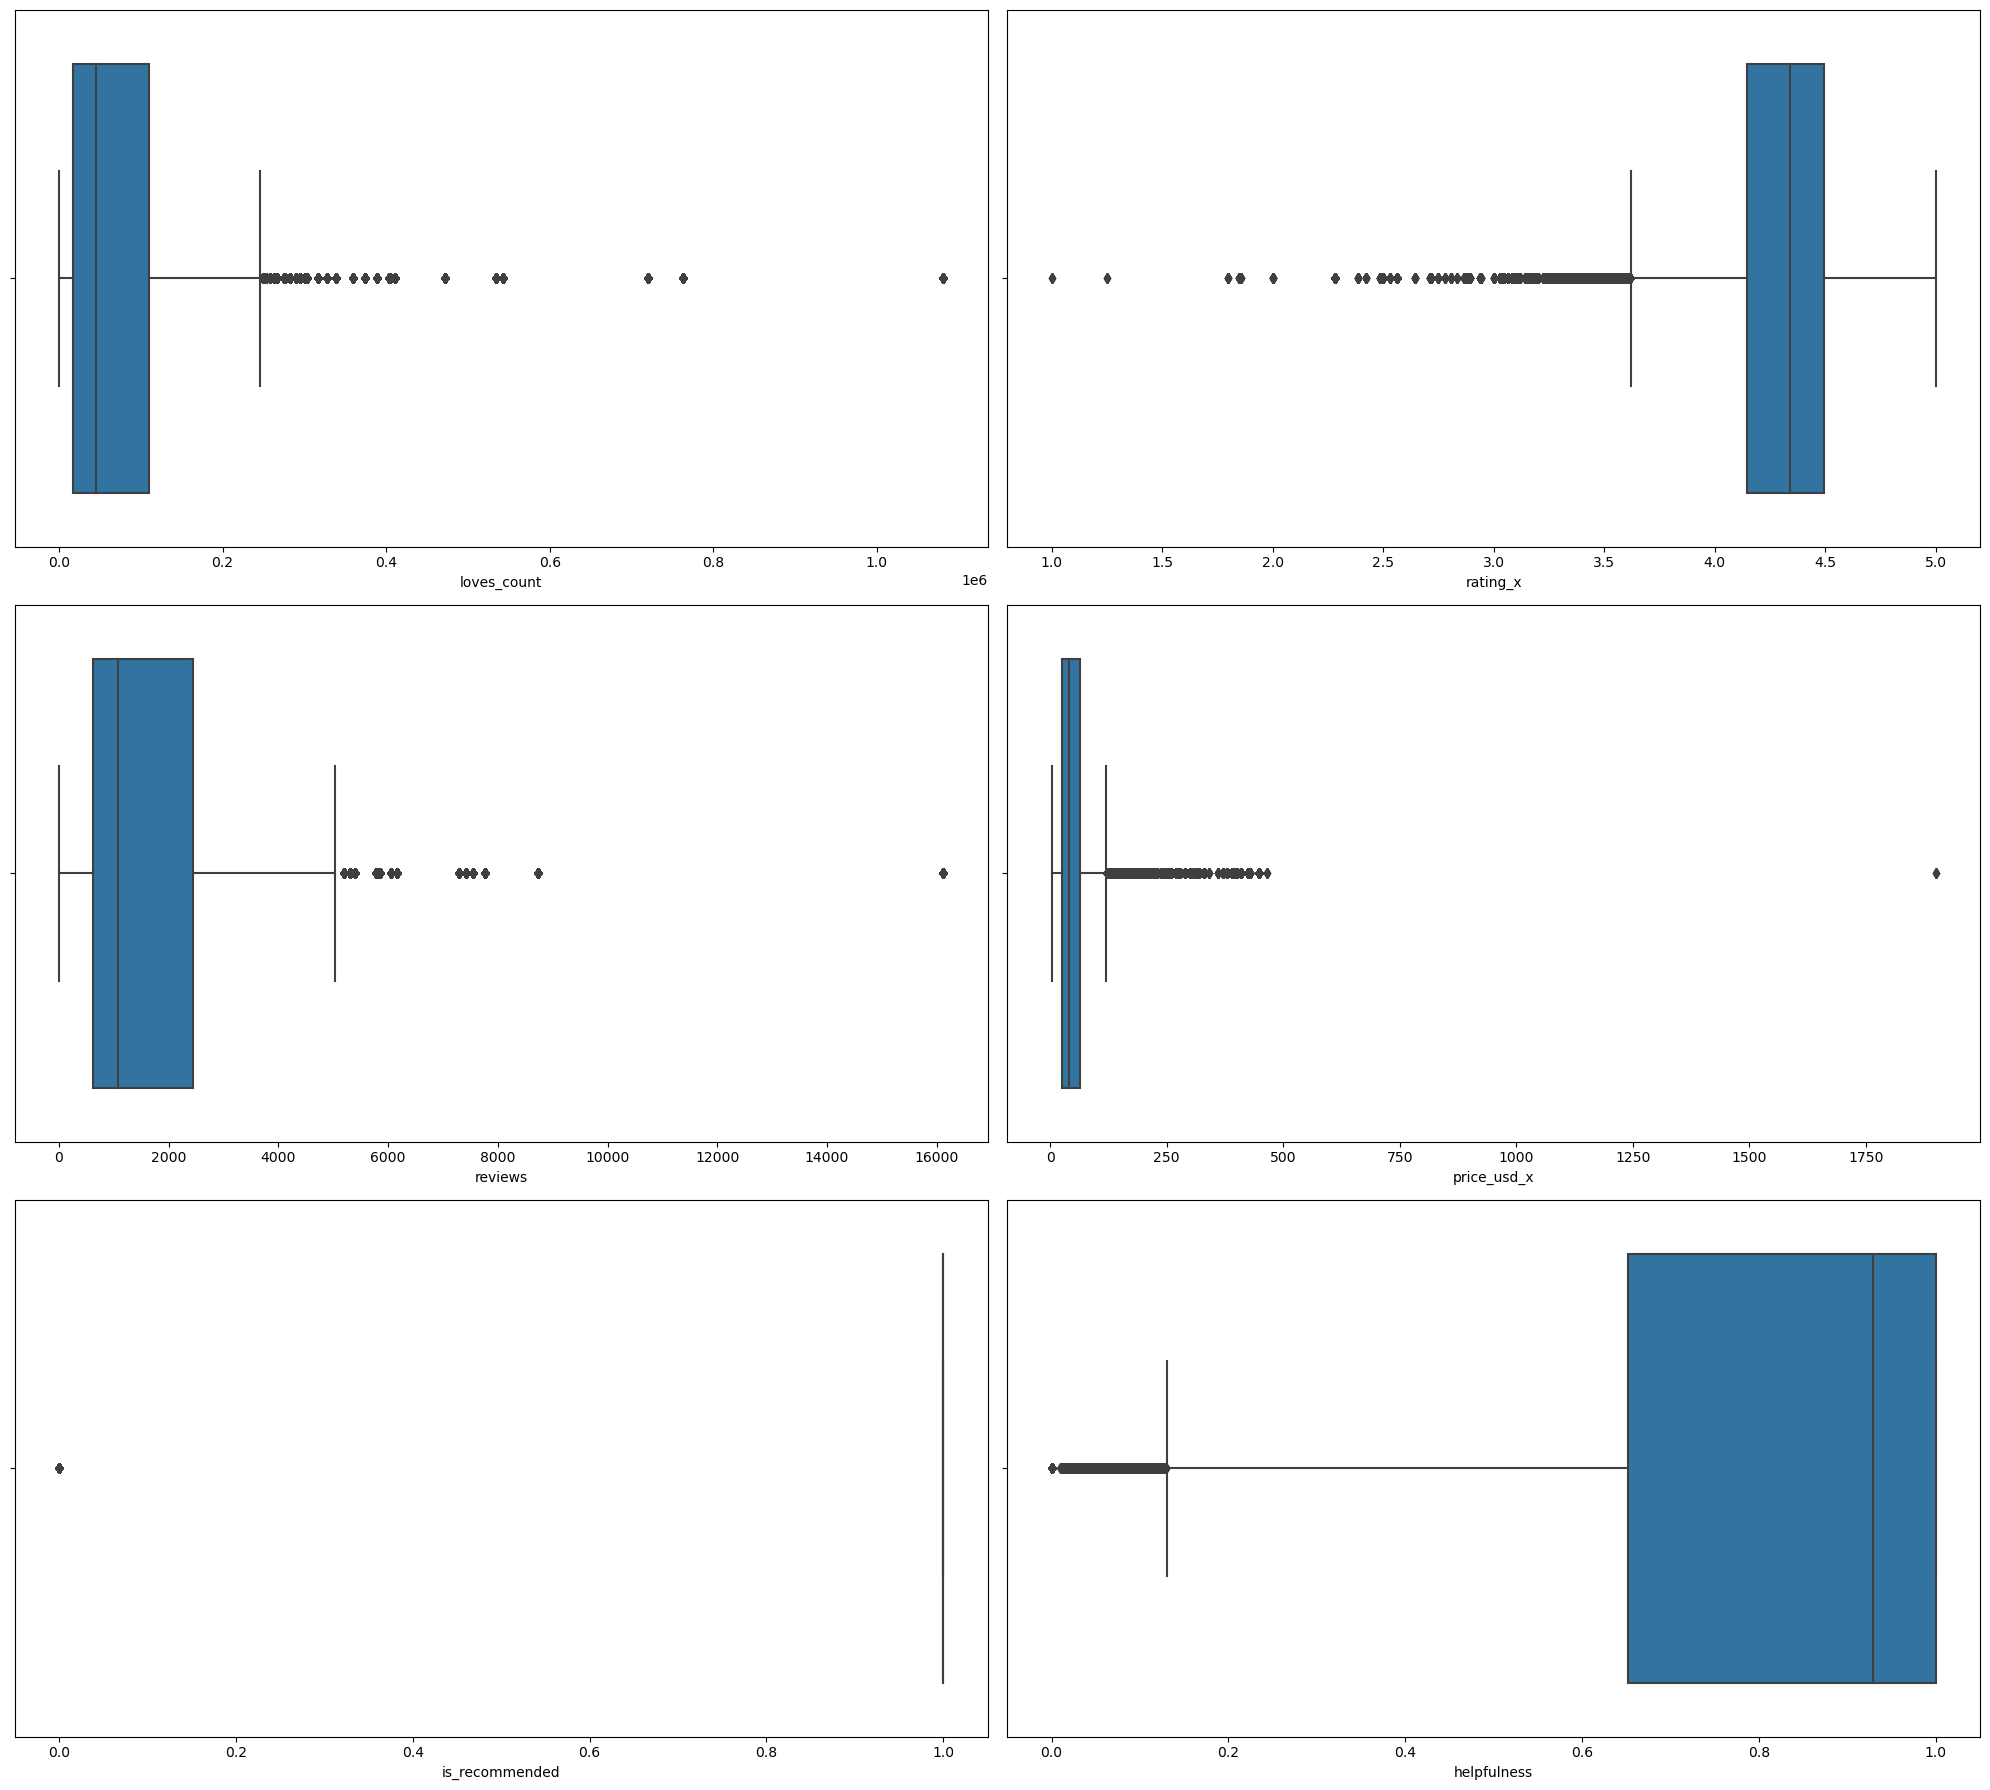

In [34]:
check_outliers(new_data, numerical_columns)

# Dealing With Duplicates

In [35]:
#dropping duplicates
new_data.drop_duplicates(inplace =True)

In [36]:
new_data.duplicated().sum()

0

In [37]:
new_data.shape

(1094093, 21)

# Dealing With Missing Values

In [38]:
new_data['helpfulness'].fillna(0, inplace =True)

In [39]:
new_data.dropna(inplace=True)


In [40]:
new_data.isna().sum()

author_id             0
product_id            0
product_name_x        0
brand_name_x          0
loves_count           0
rating_x              0
reviews               0
size                  0
ingredients           0
price_usd_x           0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
is_recommended        0
helpfulness           0
review_text           0
skin_tone             0
eye_color             0
skin_type             0
hair_color            0
dtype: int64

In [41]:
new_data.shape

(630808, 21)

# Exploratory Data Analysis

In [42]:
numerical_columns

,loves_count,rating_x,reviews,price_usd_x,is_recommended,helpfulness
0,33910.0,4.5413,1321.0,98.0,1.0,1.000000
1,33910.0,4.5413,1321.0,98.0,1.0,0.333333
2,33910.0,4.5413,1321.0,98.0,1.0,1.000000
3,33910.0,4.5413,1321.0,98.0,1.0,0.800000
4,33910.0,4.5413,1321.0,98.0,0.0,0.111111
...,...,...,...,...,...,...
1301131,13592.0,4.2500,4.0,20.0,1.0,1.000000
1301132,13592.0,4.2500,4.0,20.0,1.0,0.888889
1301133,8189.0,3.0000,3.0,28.0,0.0,NaN
1301134,8189.0,3.0000,3.0,28.0,0.0,NaN


In [43]:
categorical_columns.columns
cat_cols =categorical_columns[['primary_category', 'secondary_category',
       'tertiary_category', 'skin_tone', 'eye_color', 'skin_type',
       'hair_color']]

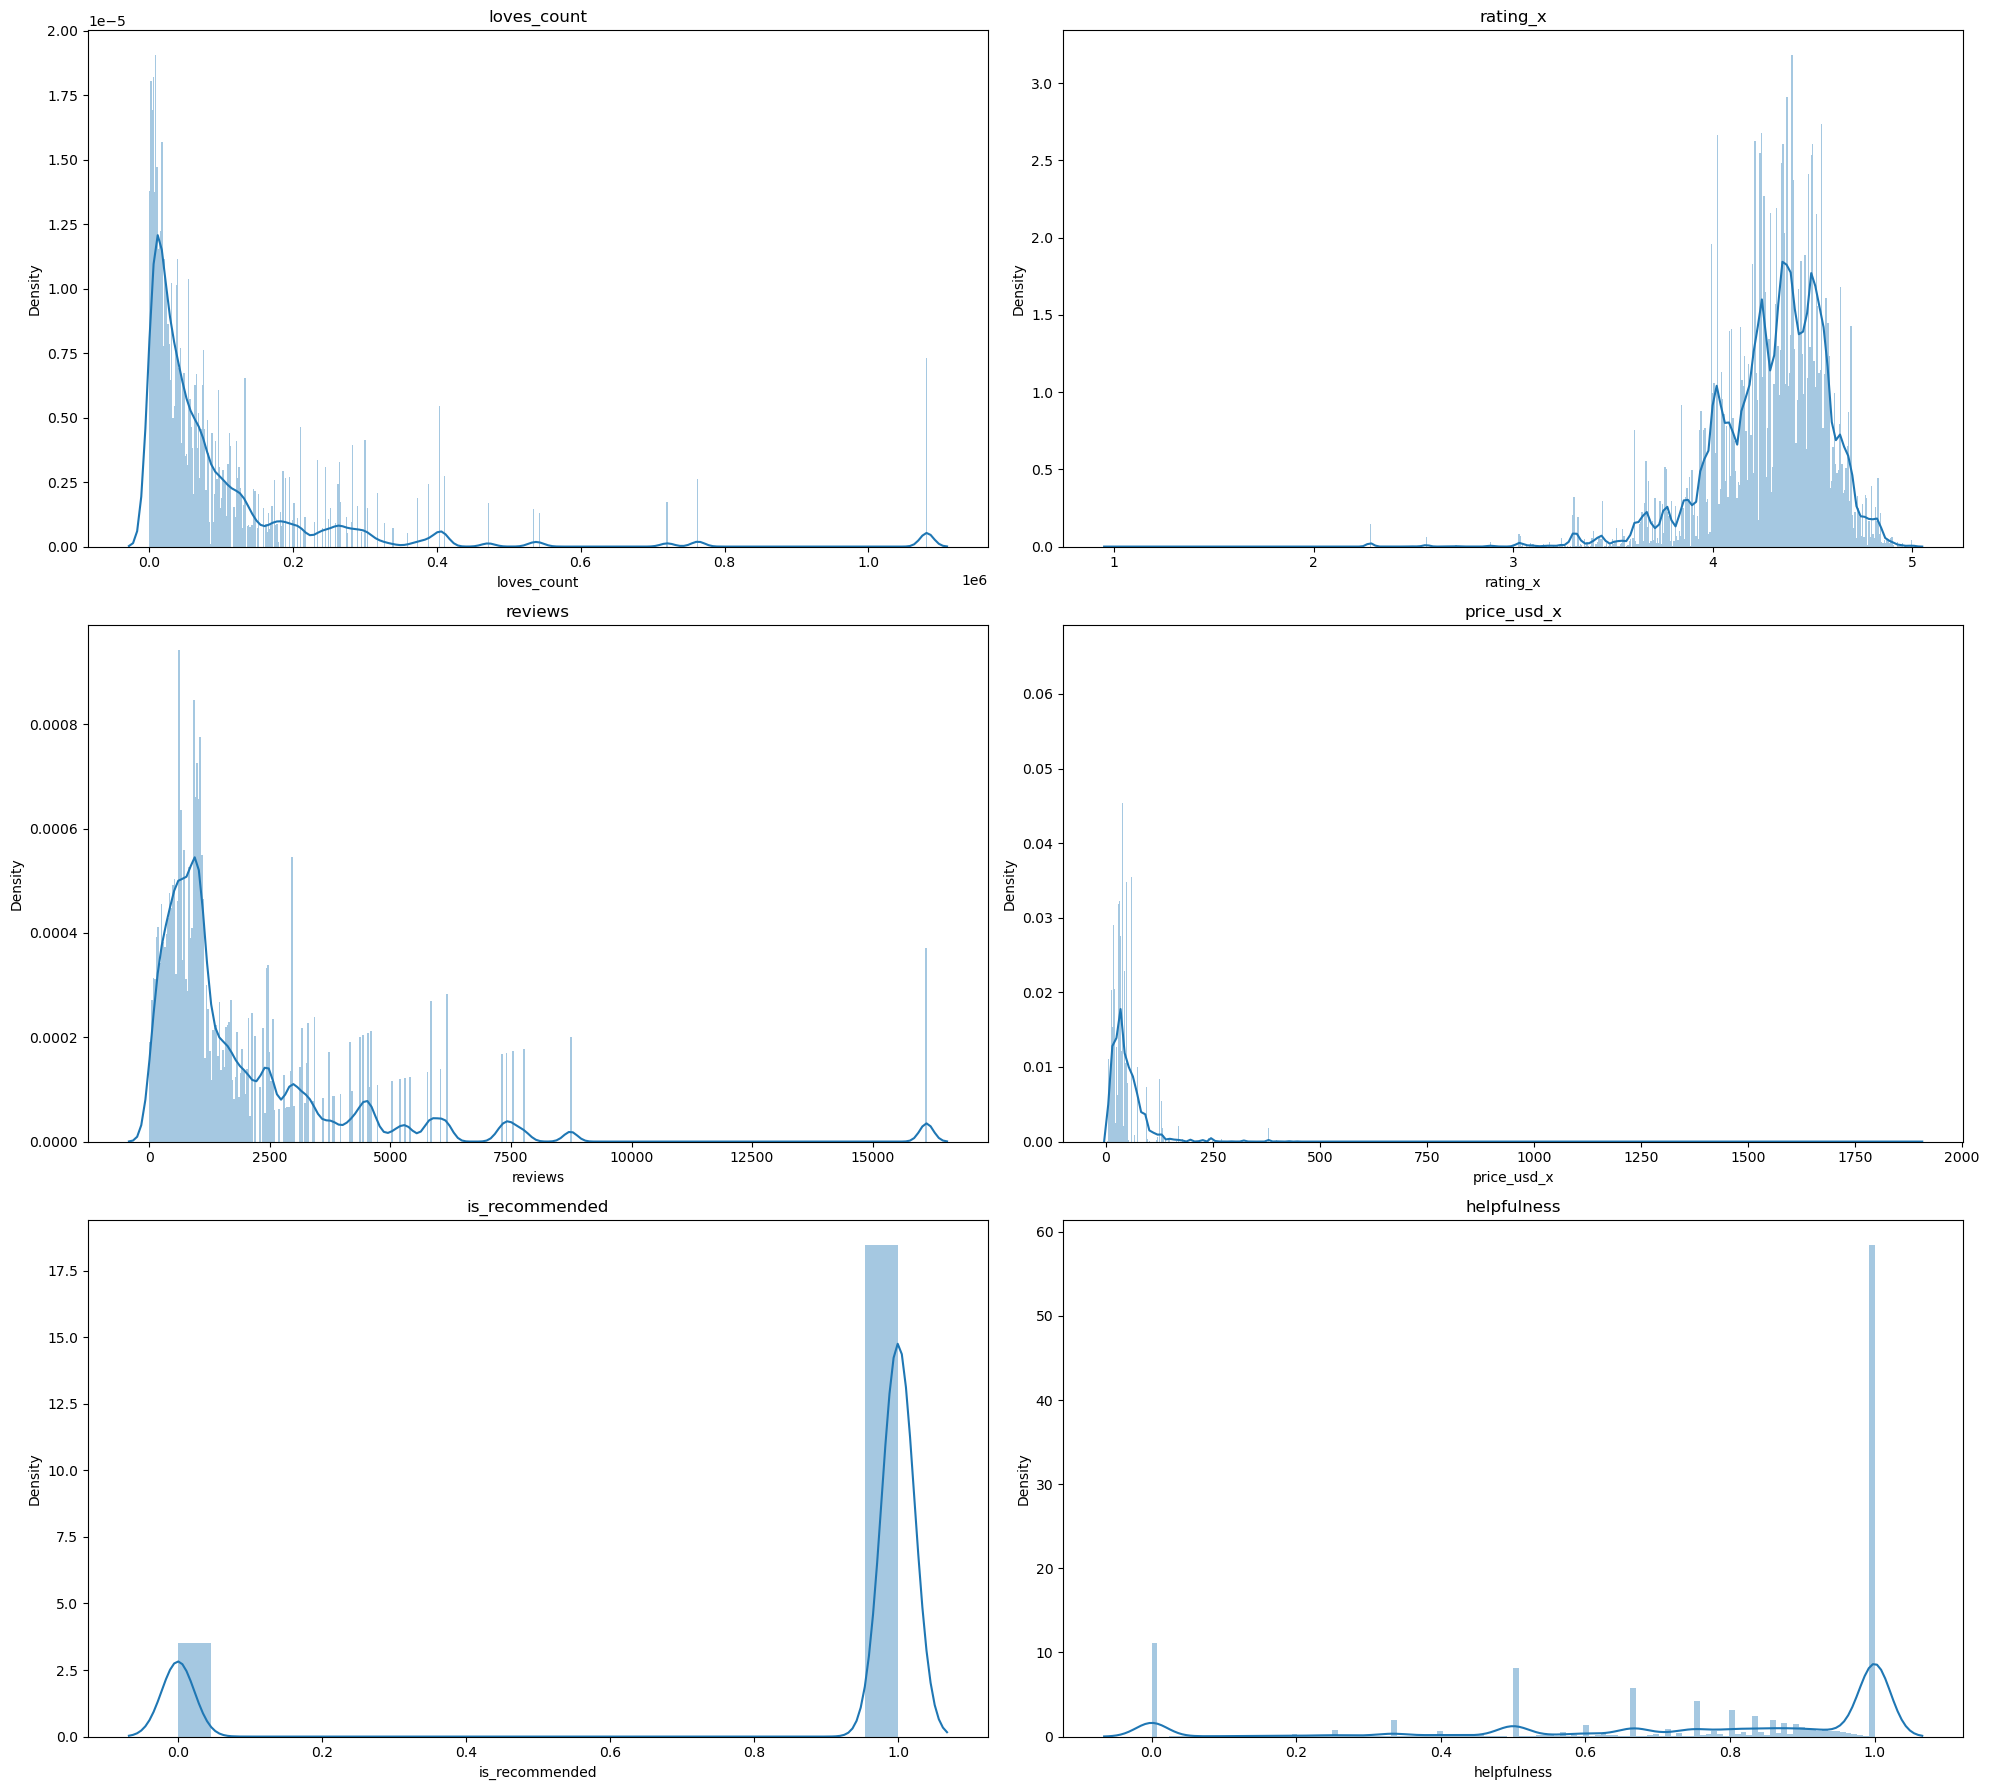

In [44]:
"""Visualizing numerical  columns"""
#create a figure and set subplots
fig, axes = plt.subplots(3,2, figsize = (20,18))
#iterate all the axes
ax = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    #plot an histogram for each column
    sns.distplot(numerical_columns[col], ax = ax[i], bins = 'auto')
    ax[i].set_title(col)

#adjust  padding
fig.tight_layout()
#display the plot
plt.show()




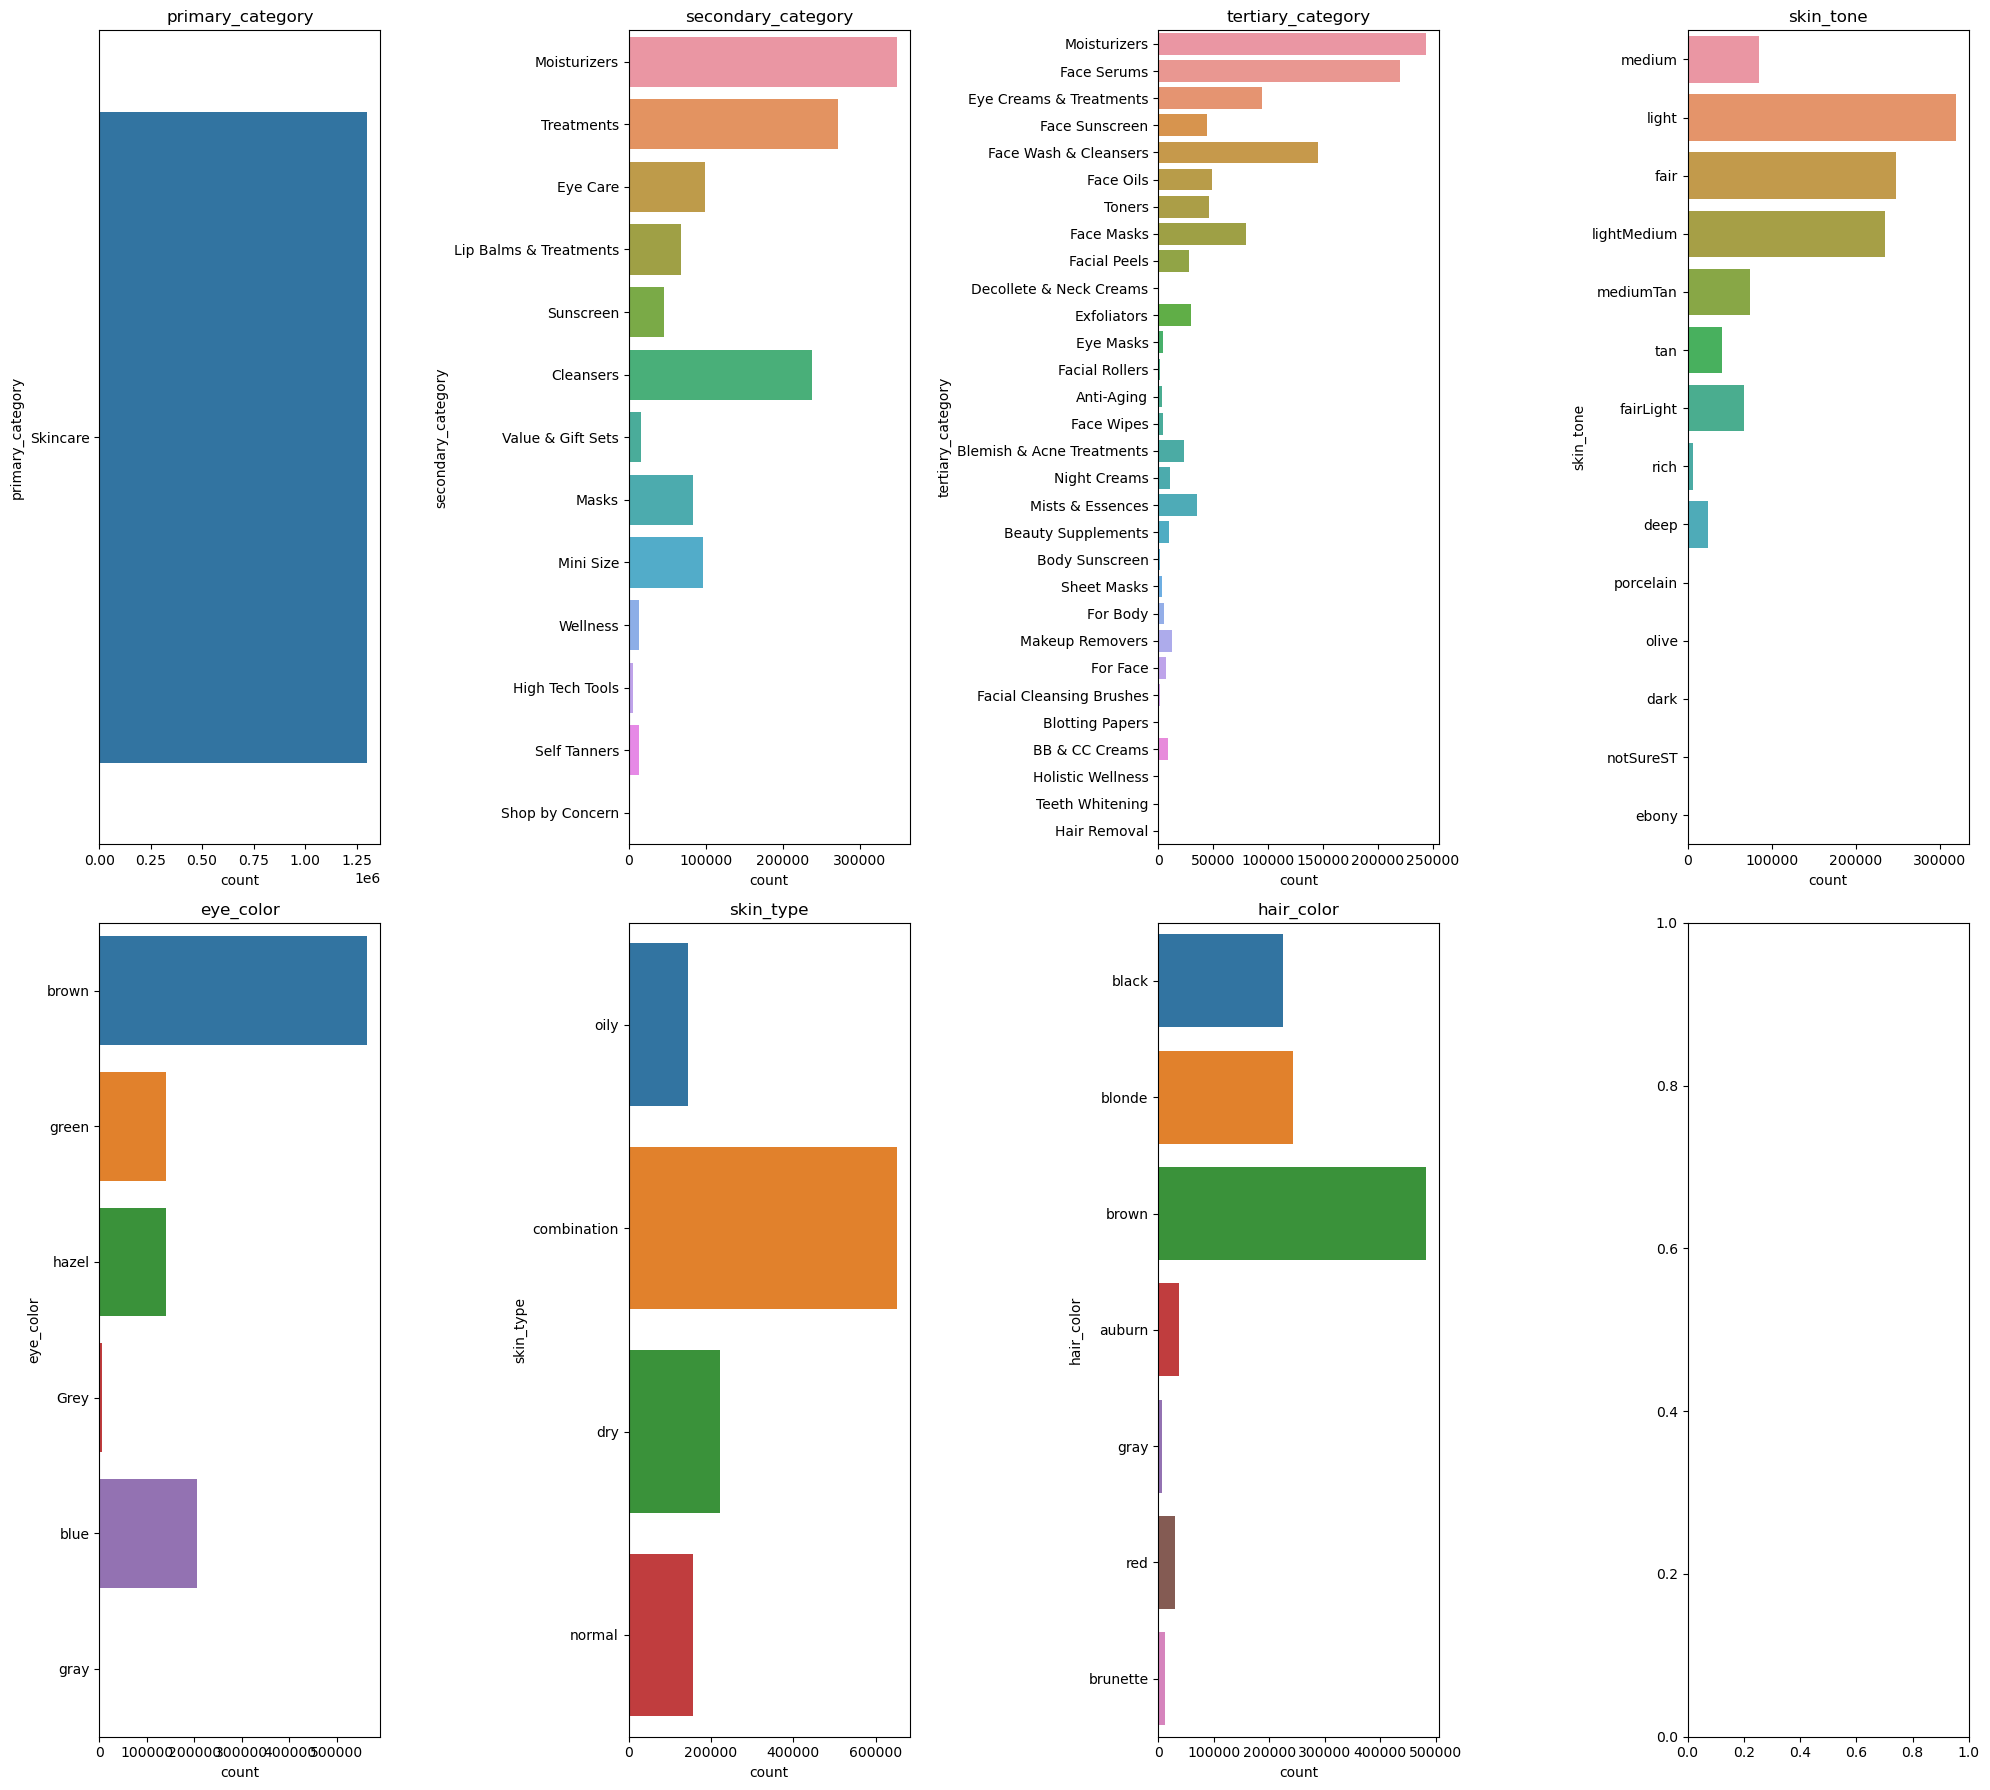

In [45]:
#visualizing categorical columns
fig, axes = plt.subplots(2, 4, figsize=(20, 18))
# Iterate over all the axes
ax = axes.flatten()

for i, col in enumerate(cat_cols.columns):
    # Plot a horizontal histogram for each column
    sns.countplot(y=cat_cols[col], ax=ax[i])
    ax[i].set_title(col)

# Adjust padding
fig.tight_layout()
# Display the plot
plt.show()

### What are the top 10 most recommended products

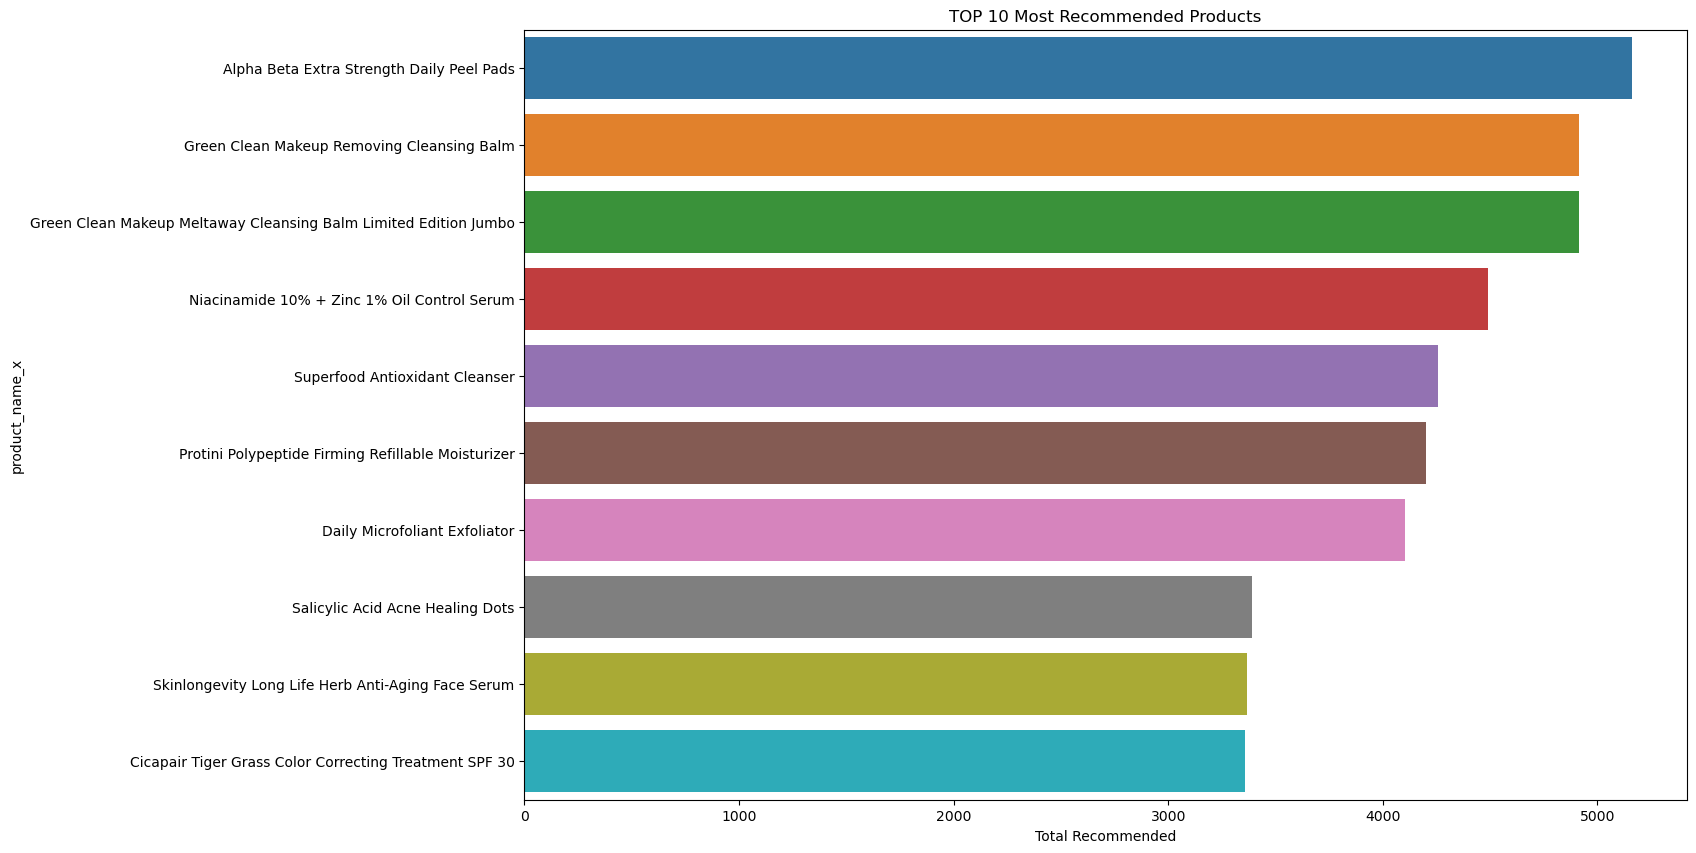

In [46]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

most_recommended = new_data.groupby(['product_id', 'product_name_x', 'brand_name_x']).sum(numeric_only=True)['is_recommended'].reset_index() \
    .sort_values('is_recommended', ascending=False).head(10)
sns.barplot(data=most_recommended, x='is_recommended', y='product_name_x', ax=ax1)
ax1.set_title("TOP 10 Most Recommended Products")
ax1.set_xlabel("Total Recommended")

plt.show()


### What are the top 10 most helpful products

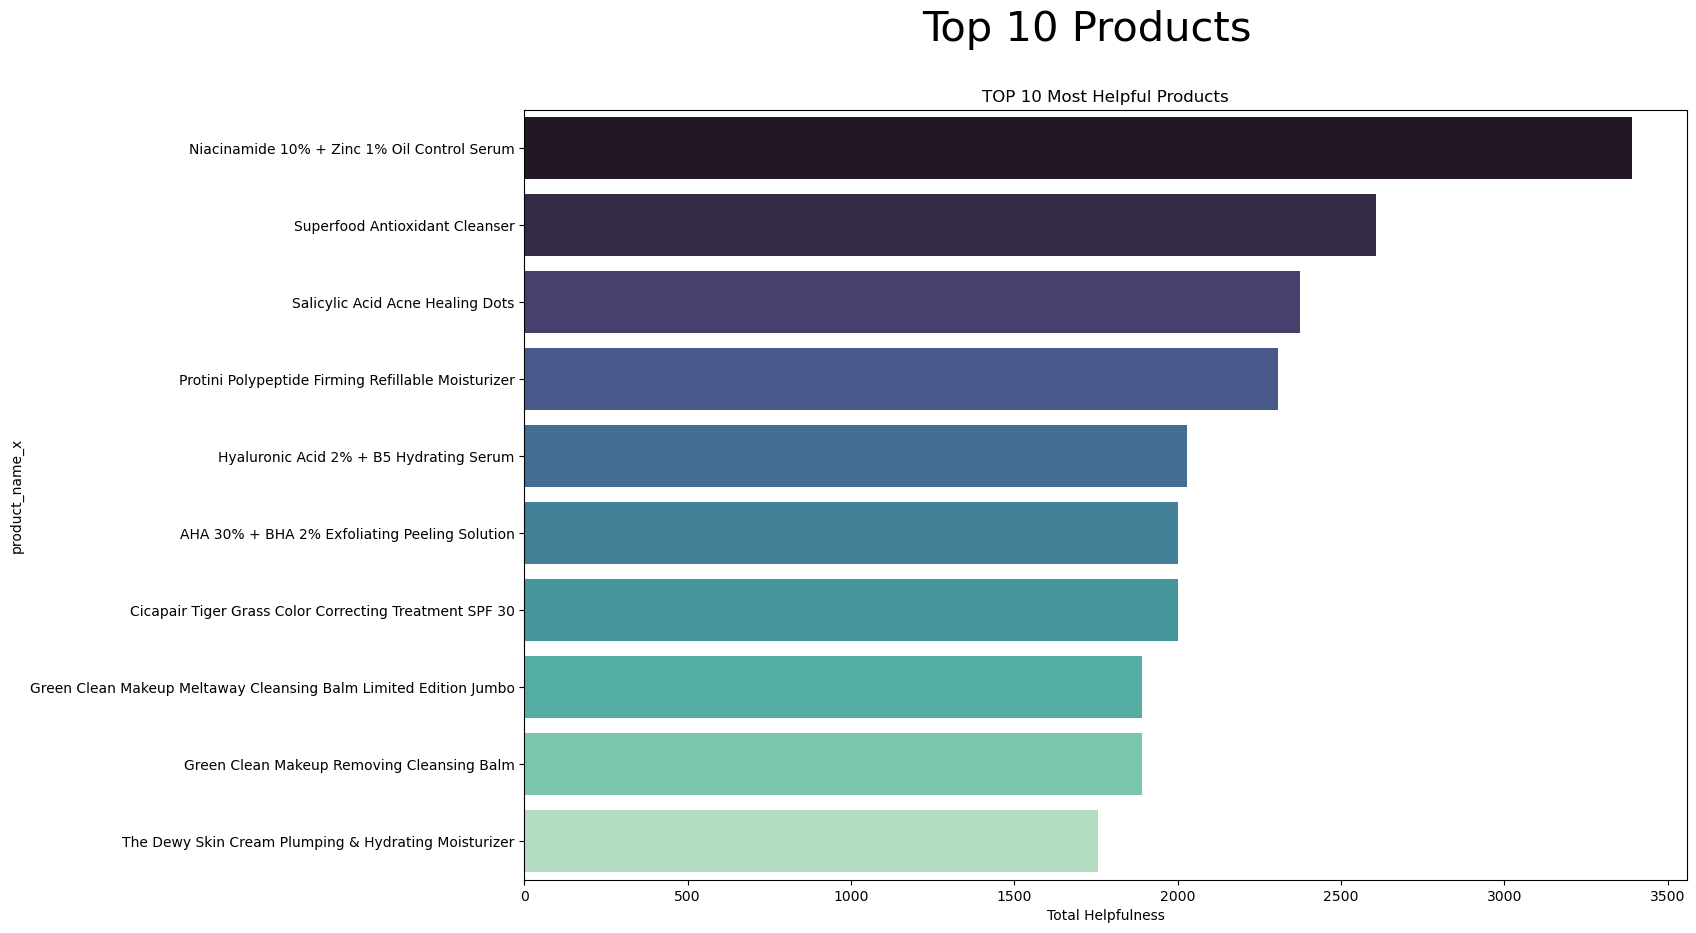

In [47]:
fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
most_helpfulness = new_data.groupby(['product_id', 'product_name_x', 'brand_name_x']).sum(numeric_only=True)['helpfulness'].reset_index() \
    .sort_values('helpfulness', ascending=False).head(10)
sns.barplot(data=most_helpfulness, x='helpfulness', y='product_name_x', ax=ax2, palette='mako')
ax2.set_title("TOP 10 Most Helpful Products")
ax2.set_xlabel("Total Helpfulness")

plt.suptitle("Top 10 Products", fontsize=30)

plt.show()

### Most recommended for each skin type

In [48]:

def plot_top_products_by_skin_type(df, skin_types):
    fig, axes = plt.subplots(nrows=len(skin_types), ncols=1, figsize=(15, 5*len(skin_types)))
    fig.subplots_adjust(hspace=0.5)

    for i, skin_type in enumerate(skin_types):
        ax = axes[i]
        skin_type_data = new_data[new_data['skin_type'] == skin_type].sort_values(['rating_x', 'price_usd_x'], ascending=[False, True]).head(10)
        ax = sns.barplot(data=skin_type_data, x='price_usd_x', y='product_name_x', ax=ax)
        ax.set_title(f"Top products based on rating and price for {skin_type} skin type")
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom')

    fig.suptitle("Most recommended product for each skin type", fontsize=30)
    plt.show()


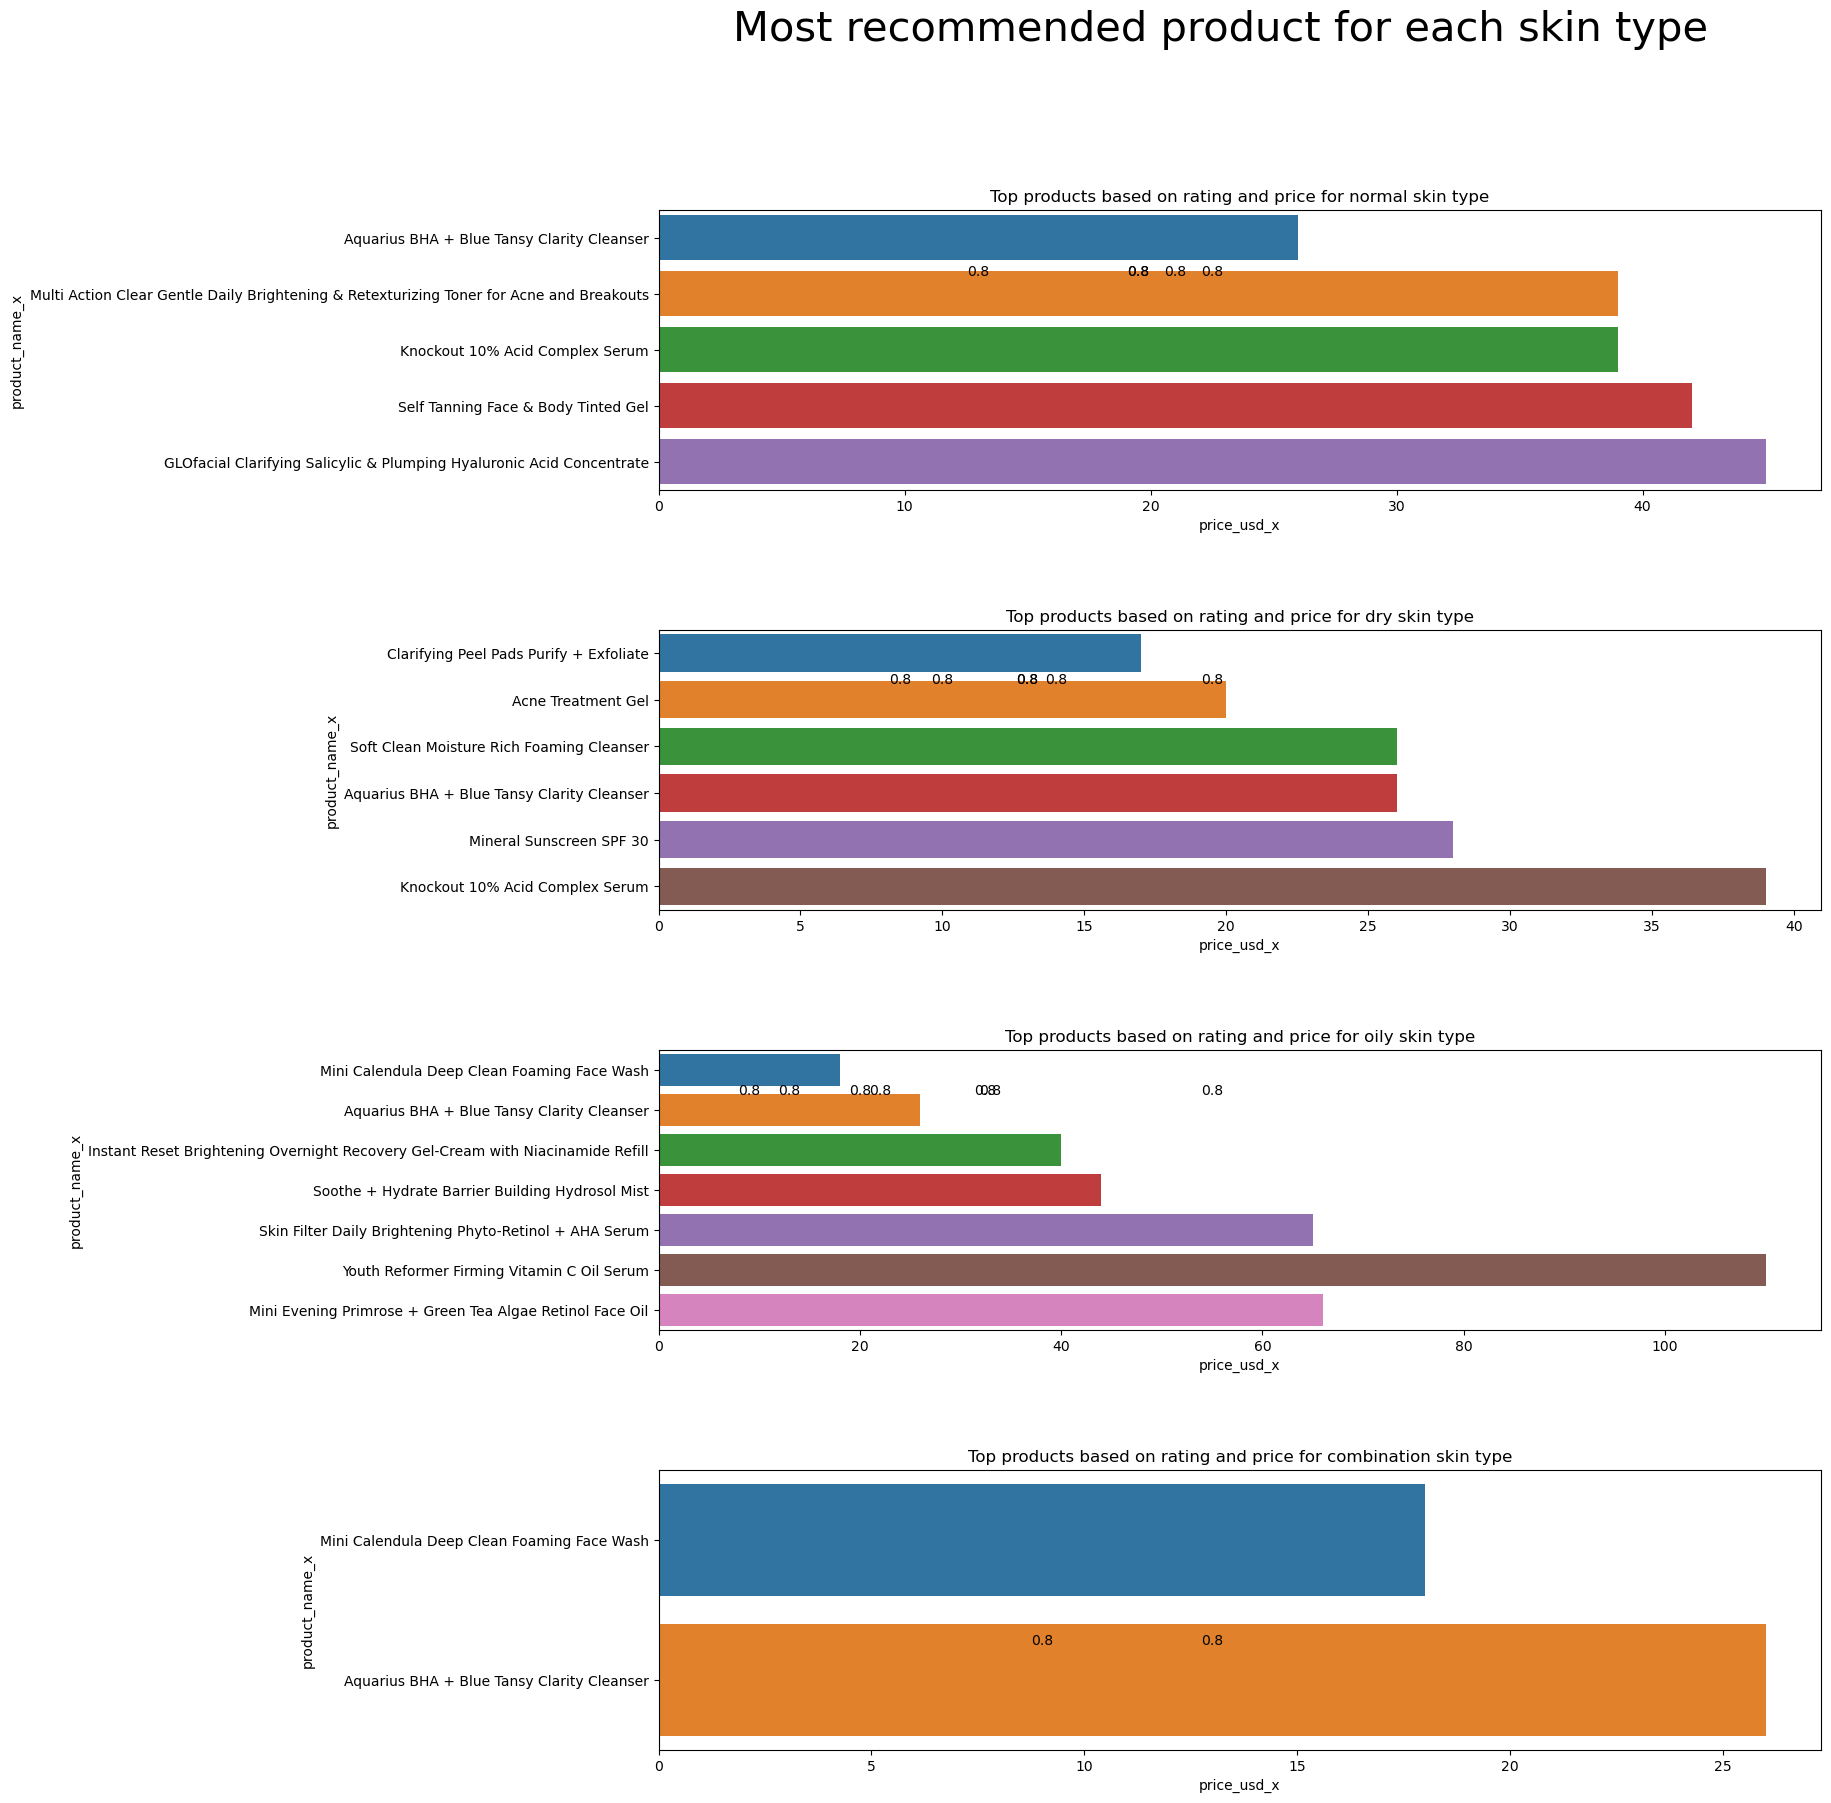

In [49]:
skin_types = ['normal', 'dry', 'oily', 'combination']
plot_top_products_by_skin_type(new_data, skin_types)

## Most recommended product for each skin tone

In [50]:

def plot_top_products_by_skin_tone(df, skin_tone):
    fig, axes = plt.subplots(nrows=len(skin_tone), ncols=1, figsize=(15, 5*len(skin_tone)))
    fig.subplots_adjust(hspace=0.5)

    for i, skin_tone in enumerate(skin_tone):
        ax = axes[i]
        skin_tone_data = df[df['skin_tone'] == skin_tone].sort_values(['rating_x', 'price_usd_x'], ascending=[False, True]).head(10)
        ax = sns.barplot(data=skin_tone_data, x='price_usd_x', y='product_name_x', ax=ax)
        ax.set_title(f"Top products based on rating and price for {skin_tone} skin tone")
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom')

    fig.suptitle("Most recommended product for each skin tone", fontsize=30)
    plt.show()


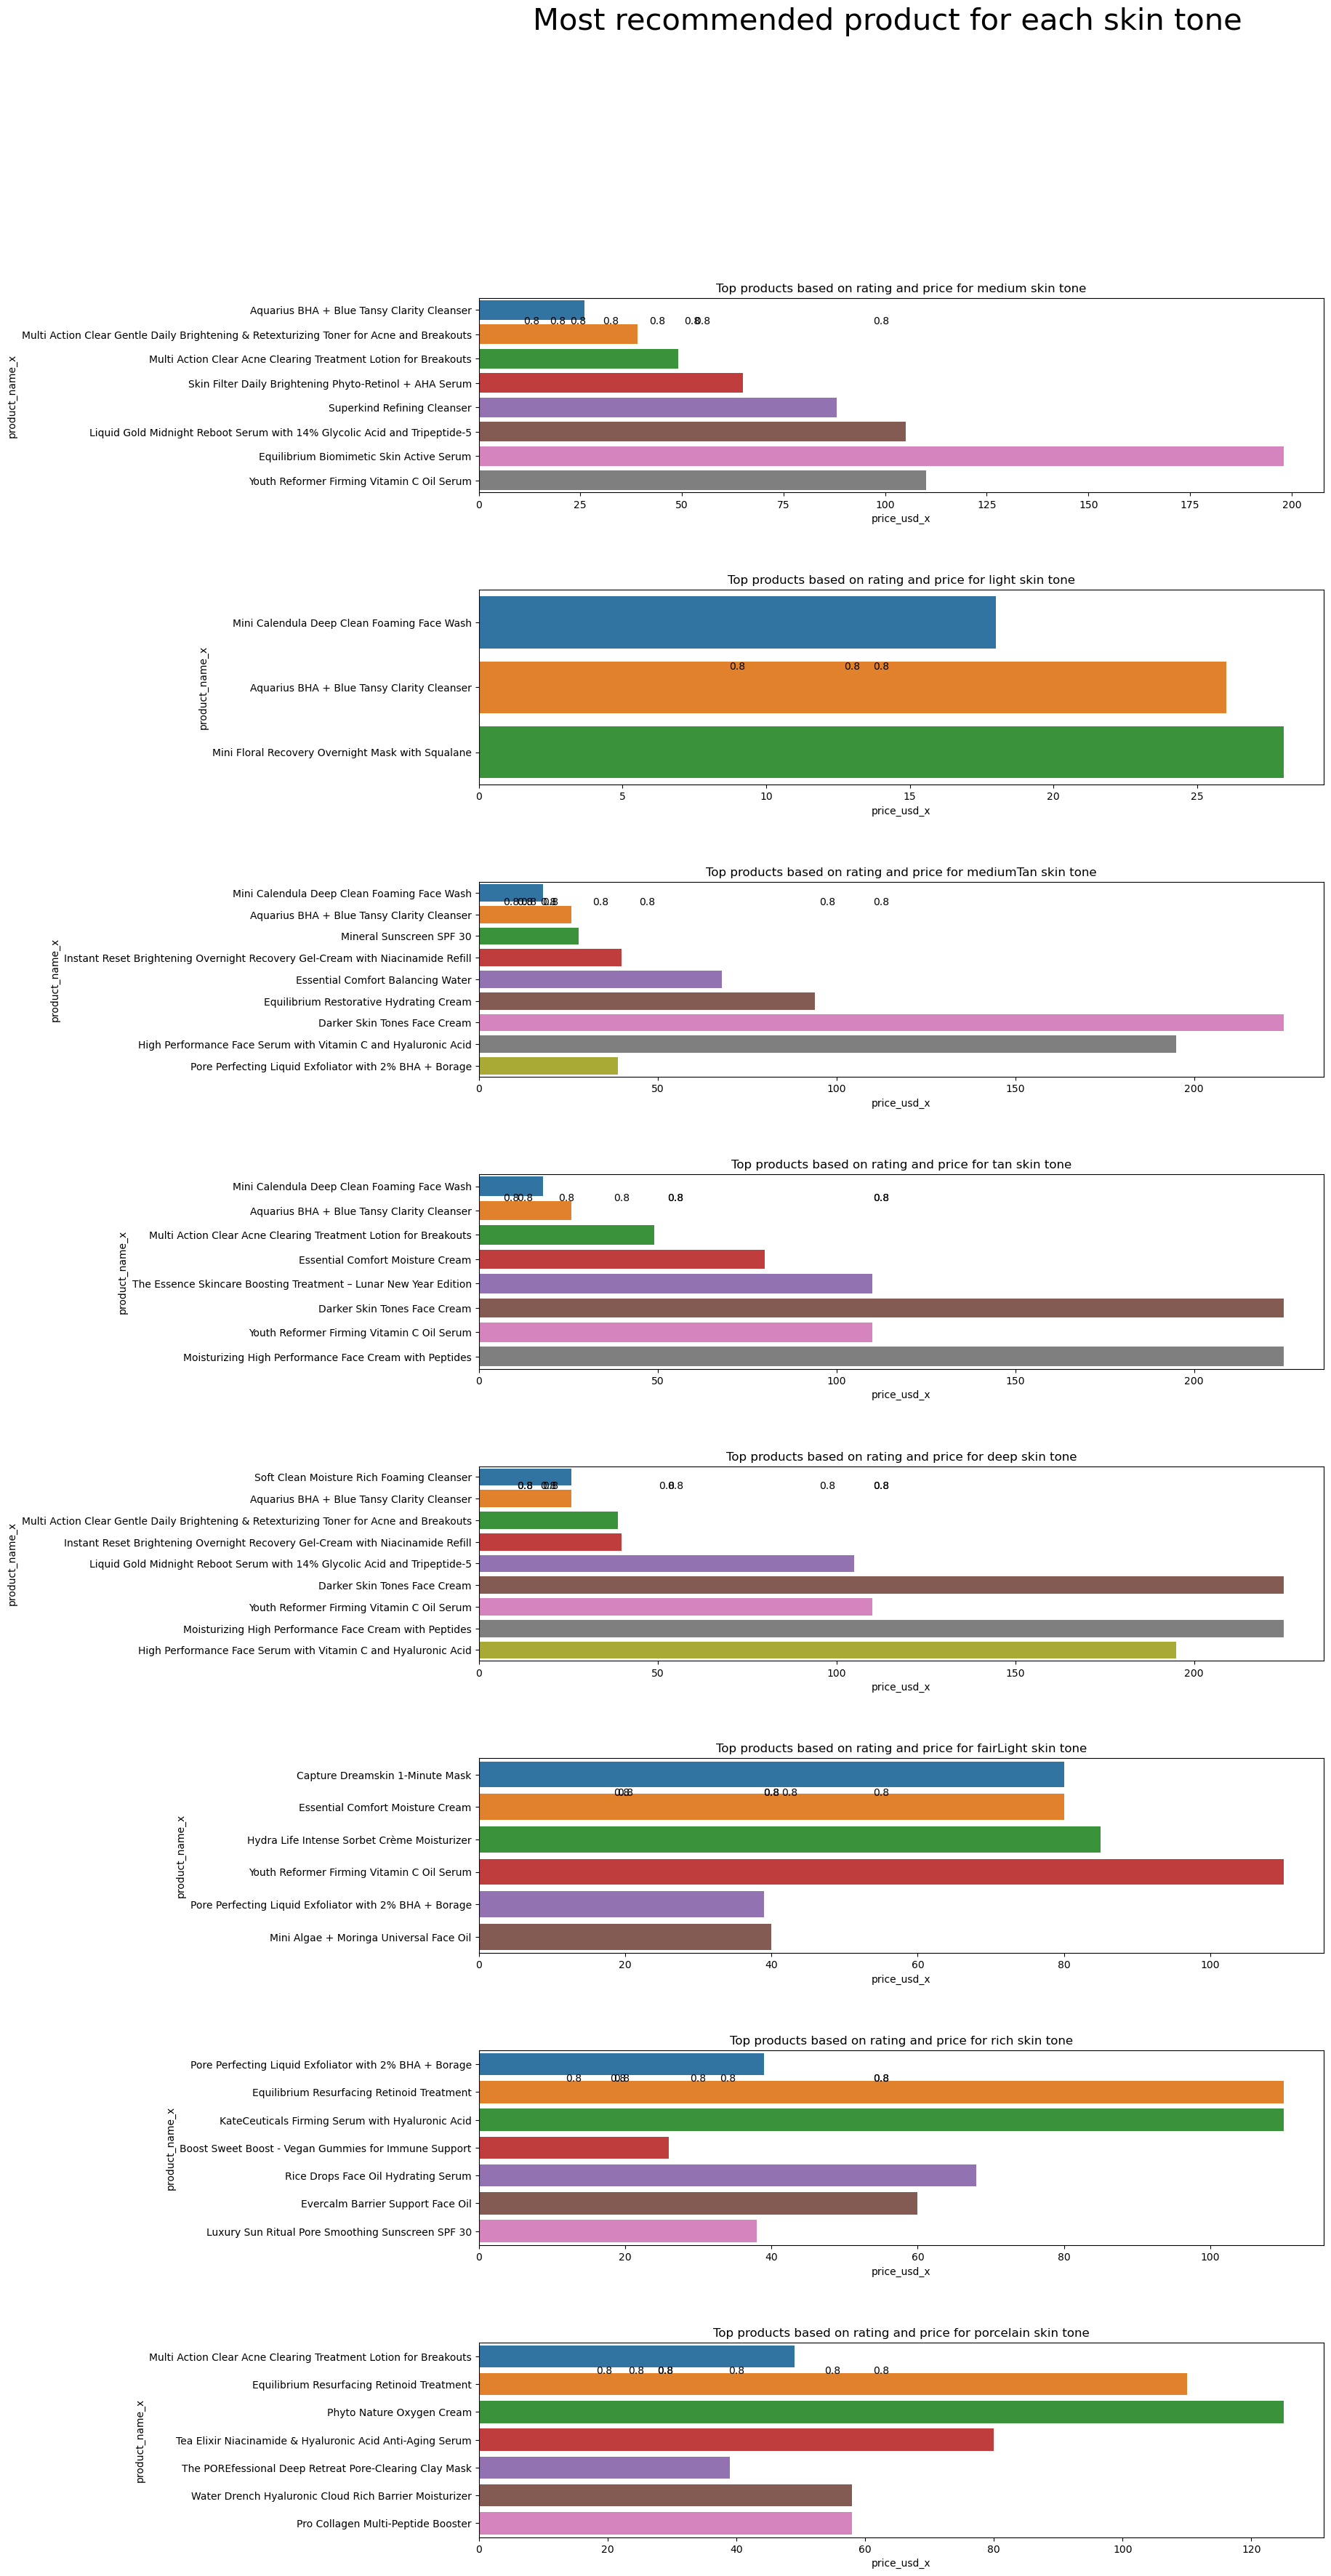

In [51]:
skin_tone = ['medium', 'light','mediumTan', 'tan', 'deep', 'fairLight', 'rich', 'porcelain',]
plot_top_products_by_skin_tone(new_data, skin_tone)

## Most recommended product for each skin tone

In [52]:

def plot_top_products_by_skin_tone(df, skin_tone):
    # Create subplots with appropriate number of rows and columns
    fig, axes = plt.subplots(nrows=len(skin_tone), ncols=1, figsize=(17, 5*len(skin_tone)))
    fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

    # Iterate over each skin tone
    for i, skin_tone in enumerate(skin_tone):
        ax = axes[i]  # Select the current axis
        # Filter the dataframe based on the current skin tone and sort the values
        skin_tone_data = df[df['skin_tone'] == skin_tone].sort_values(['rating_x', 'price_usd_x'], ascending=[False, True]).head(10)

        # Create a bar plot for the top products of the current skin tone
        ax = sns.barplot(data=skin_tone_data, x='price_usd_x', y='product_name_x', ax=ax)
        ax.set_title(f"Top products based on rating and price for {skin_tone} skin tone")

        # Annotate the bar plot with the heights of the bars
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom')

    # Add a title to the entire figure
    fig.suptitle("Most recommended product for each skin tone", fontsize=30)

    # Display the plot
    plt.show()


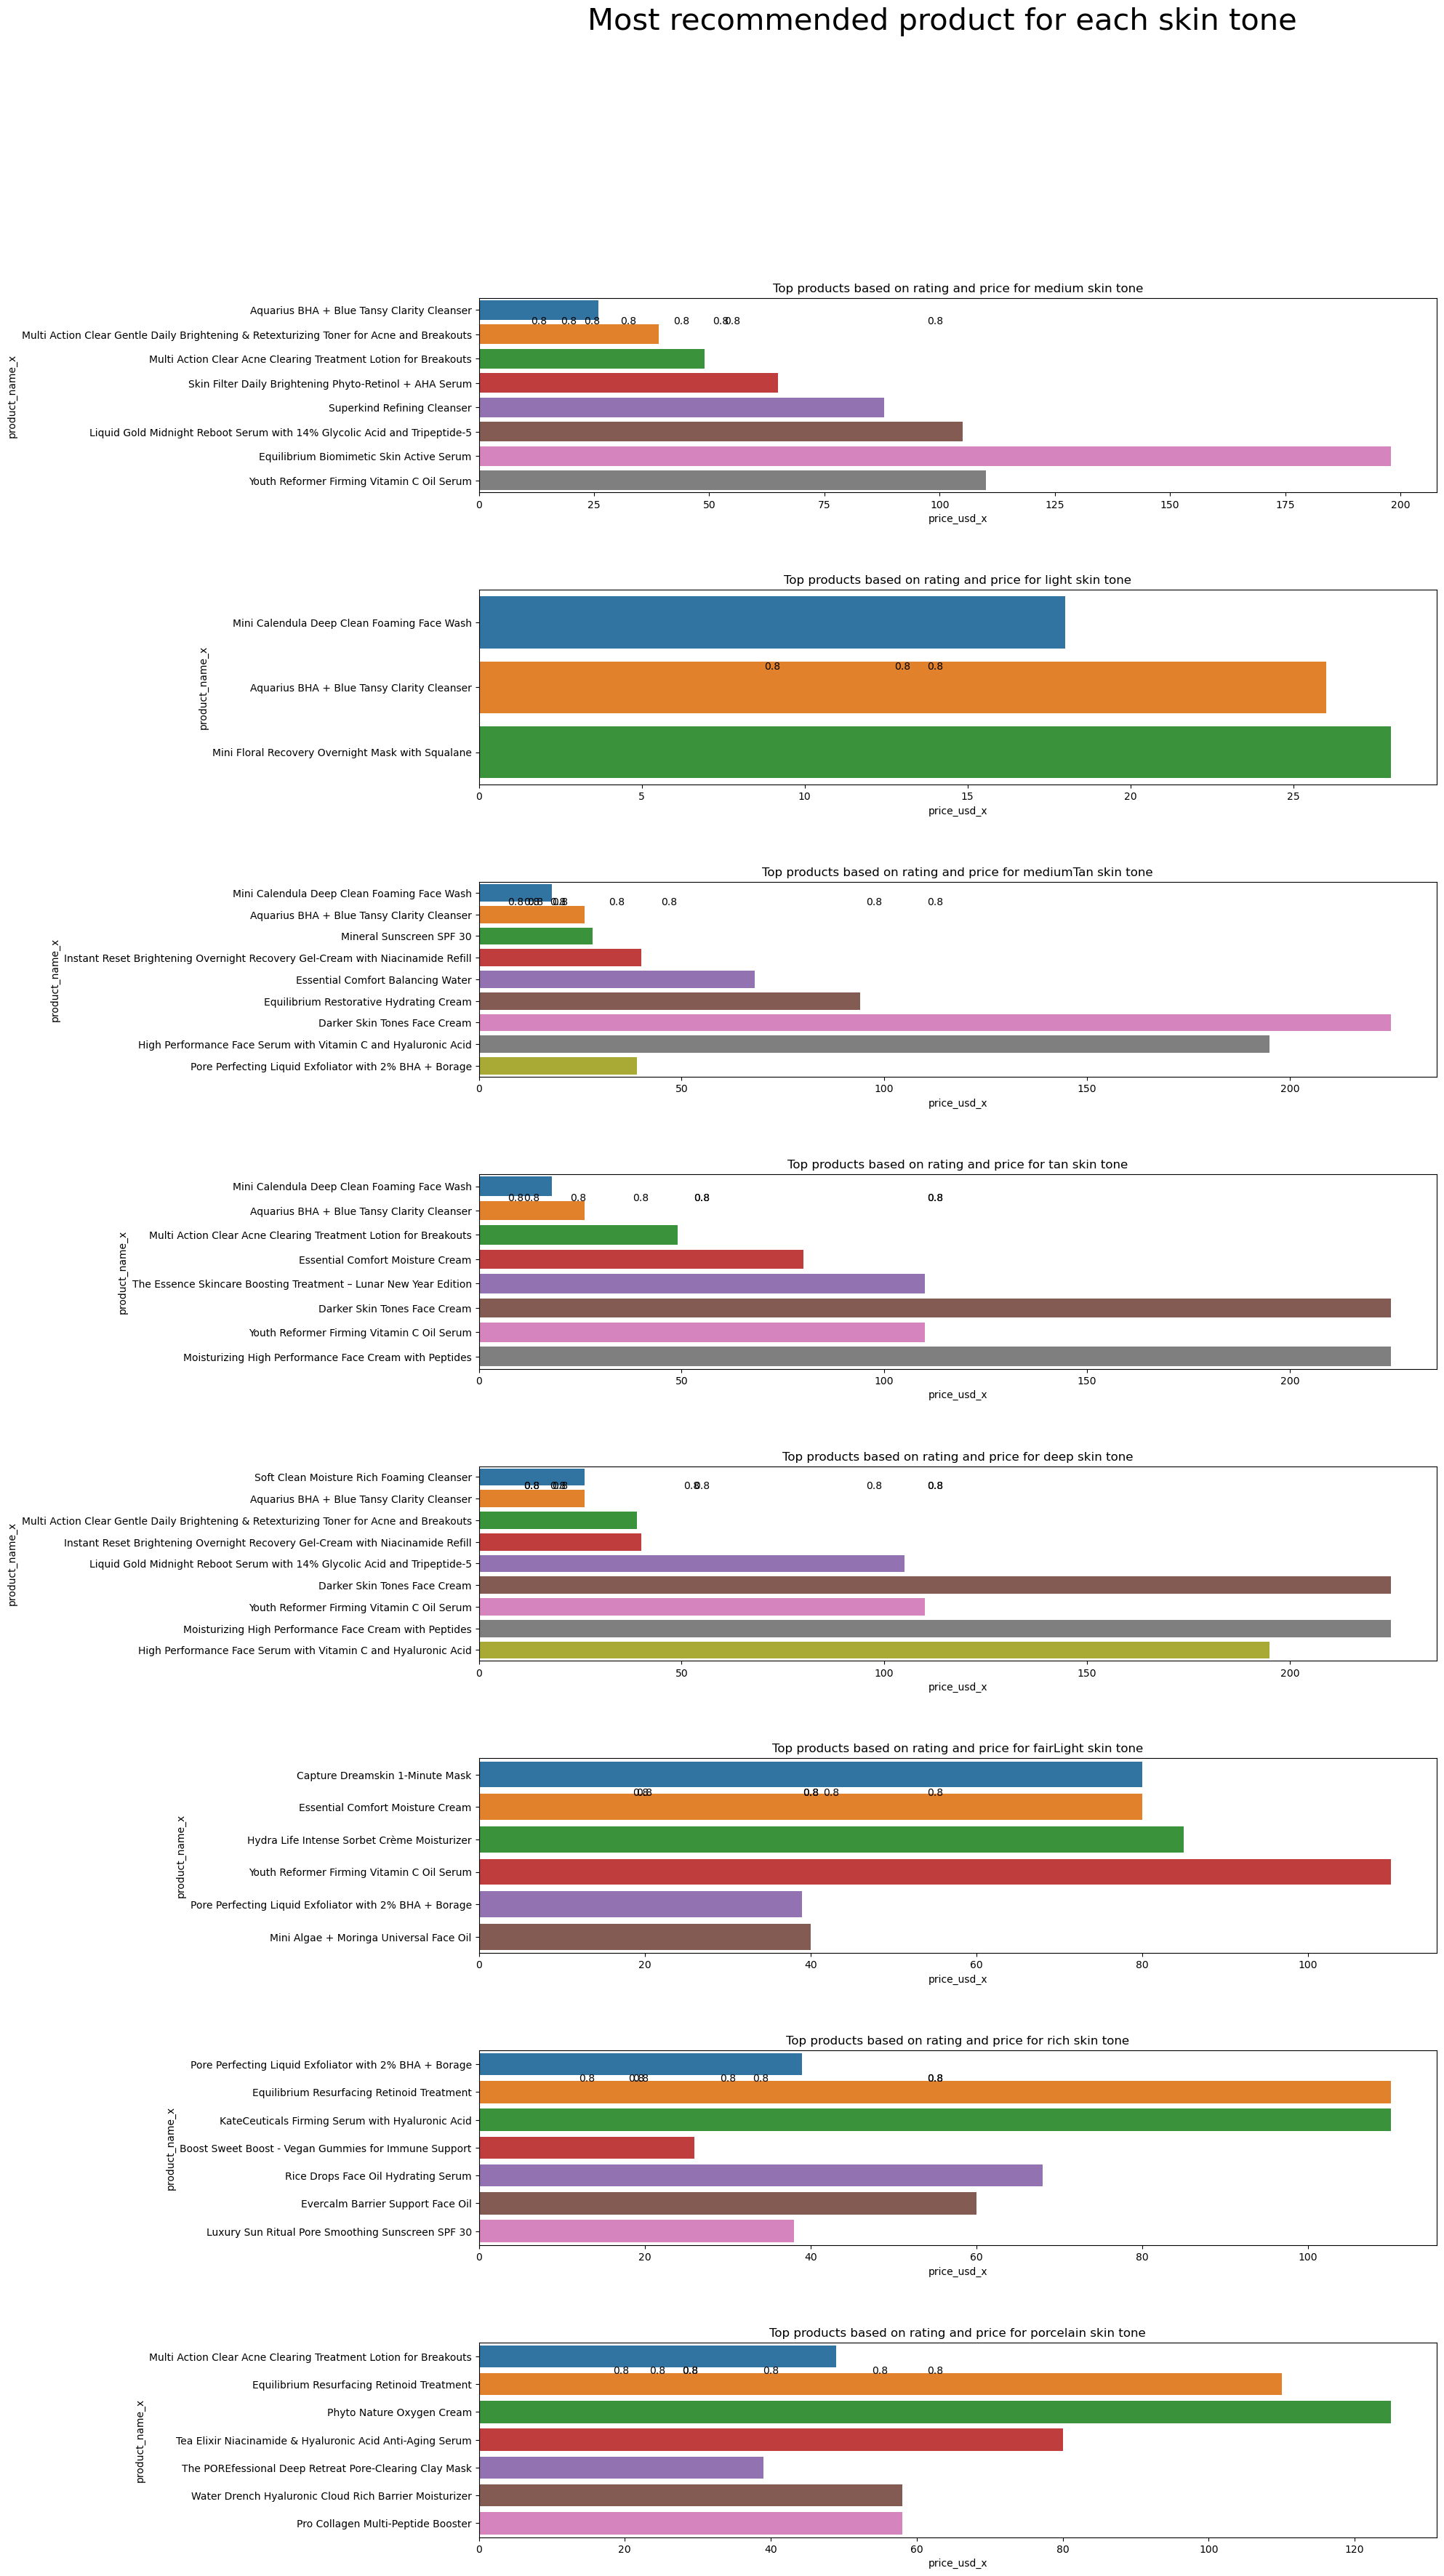

In [53]:
skin_tone = ['medium', 'light','mediumTan', 'tan', 'deep', 'fairLight', 'rich', 'porcelain',]
plot_top_products_by_skin_tone(new_data, skin_tone)

## Most recommended product for each hair color

In [54]:
def plot_top_products_by_hair_color(df, hair_color):
    # Create subplots based on the number of hair colors provided
    fig, axes = plt.subplots(nrows=len(hair_color), ncols=1, figsize=(15, 5*len(hair_color)))
    fig.subplots_adjust(hspace=0.5)

    # Iterate over each hair color
    for i, hair_color in enumerate(hair_color):
        ax = axes[i]

        # Filter the dataframe to include only rows with the current hair color
        hair_color_data = df[df['hair_color'] == hair_color].sort_values(['rating_x', 'price_usd_x'], ascending=[False, True]).head(10)

        # Create a bar plot showing the product names on the y-axis and the price on the x-axis
        ax = sns.barplot(data=hair_color_data, x='price_usd_x', y='product_name_x', ax=ax)
        ax.set_title(f"Top products based on rating and price for {hair_color} hair color")

        # Add labels to the bars showing their heights
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom')

    # Set the title for the entire plot
    fig.suptitle("Most recommended product for each hair color", fontsize=30)

    # Display the plot
    plt.show()

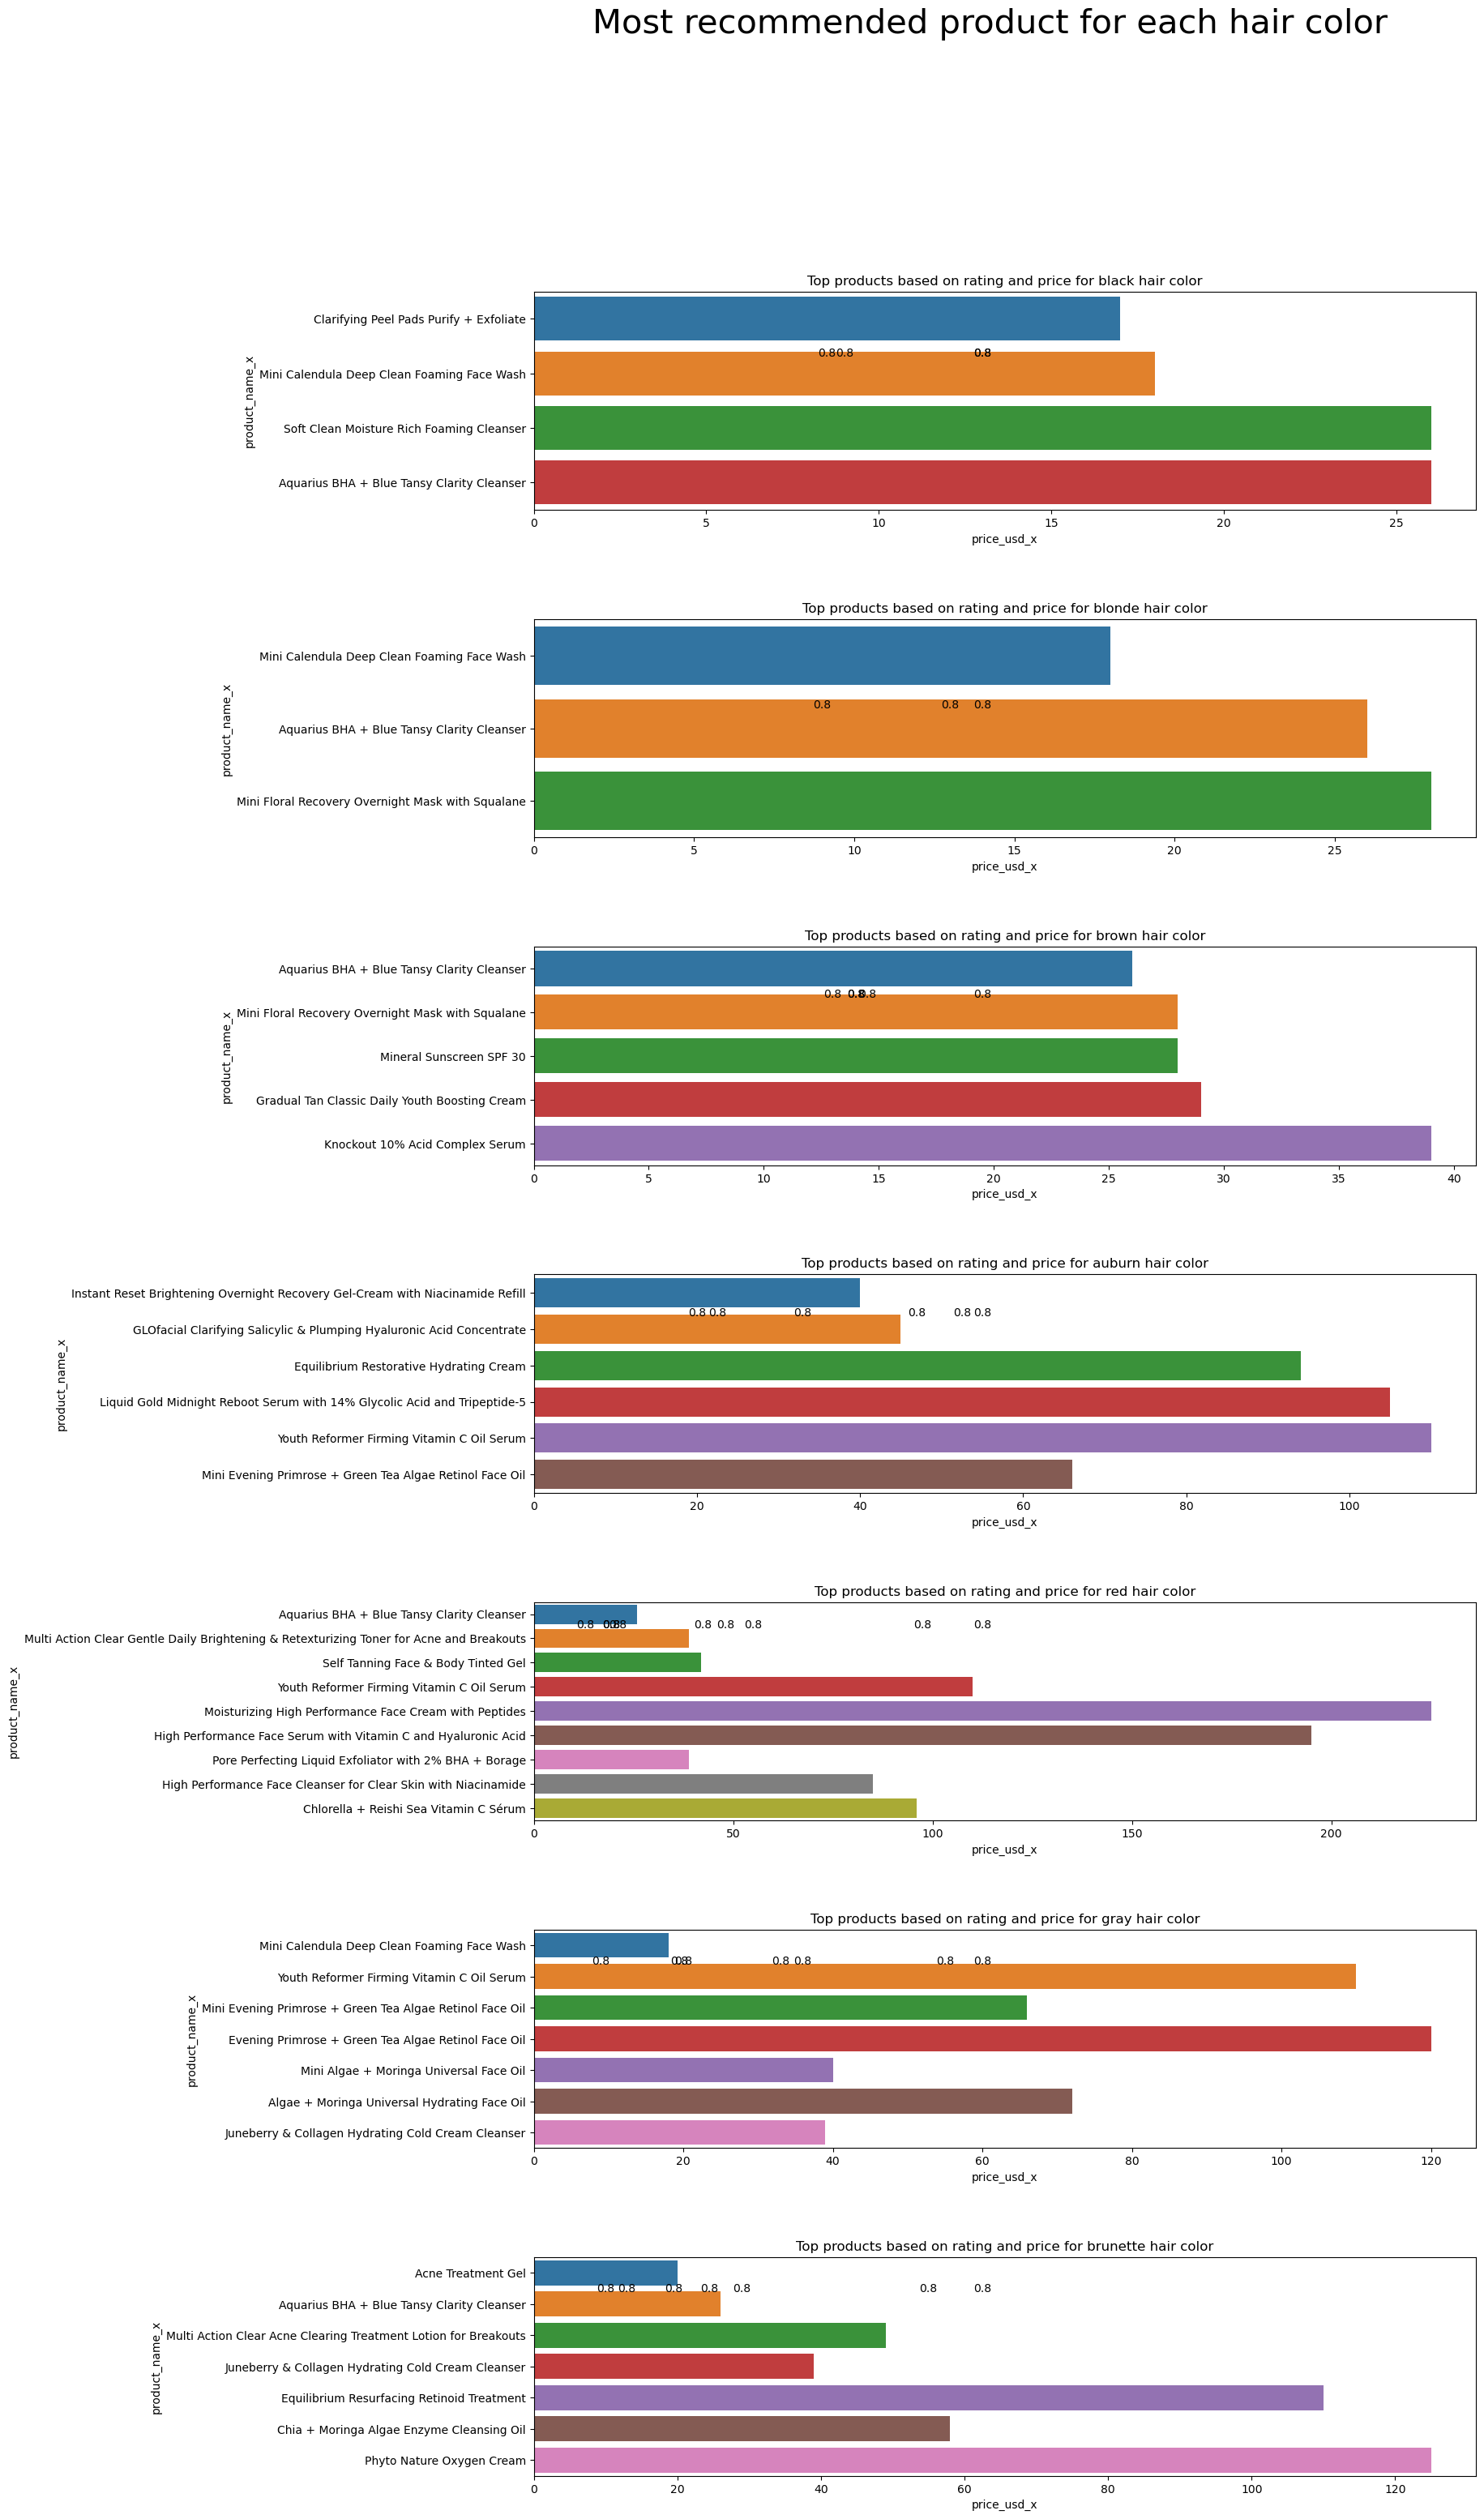

In [55]:
hair_color = ['black', 'blonde','brown',"auburn", "red", "gray", "brunette" ]
plot_top_products_by_hair_color(new_data, hair_color)

## Most recommended product for each eye color

In [56]:
def plot_top_products_by_eye_color(df, eye_color):
    # Create subplots based on the number of eye colors provided
    fig, axes = plt.subplots(nrows=len(eye_color), ncols=1, figsize=(15, 5*len(eye_color)))
    fig.subplots_adjust(hspace=0.5)

    # Iterate over each eye color
    for i, eye_color in enumerate(eye_color):
        ax = axes[i]

        # Filter the dataframe to include only rows with the current eye color
        eye_color_data = df[df['eye_color'] == eye_color].sort_values(['rating_x', 'price_usd_x'], ascending=[False, True]).head(10)

        # Create a bar plot showing the product names on the y-axis and the price on the x-axis
        ax = sns.barplot(data=eye_color_data, x='price_usd_x', y='product_name_x', ax=ax)
        ax.set_title(f"Top products based on rating and price for {eye_color} eye color")

        # Add labels to the bars showing their heights
        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom')

    # Set the title for the entire plot
    fig.suptitle("Most recommended product for each eye color", fontsize=30)

    # Display the plot
    plt.show()

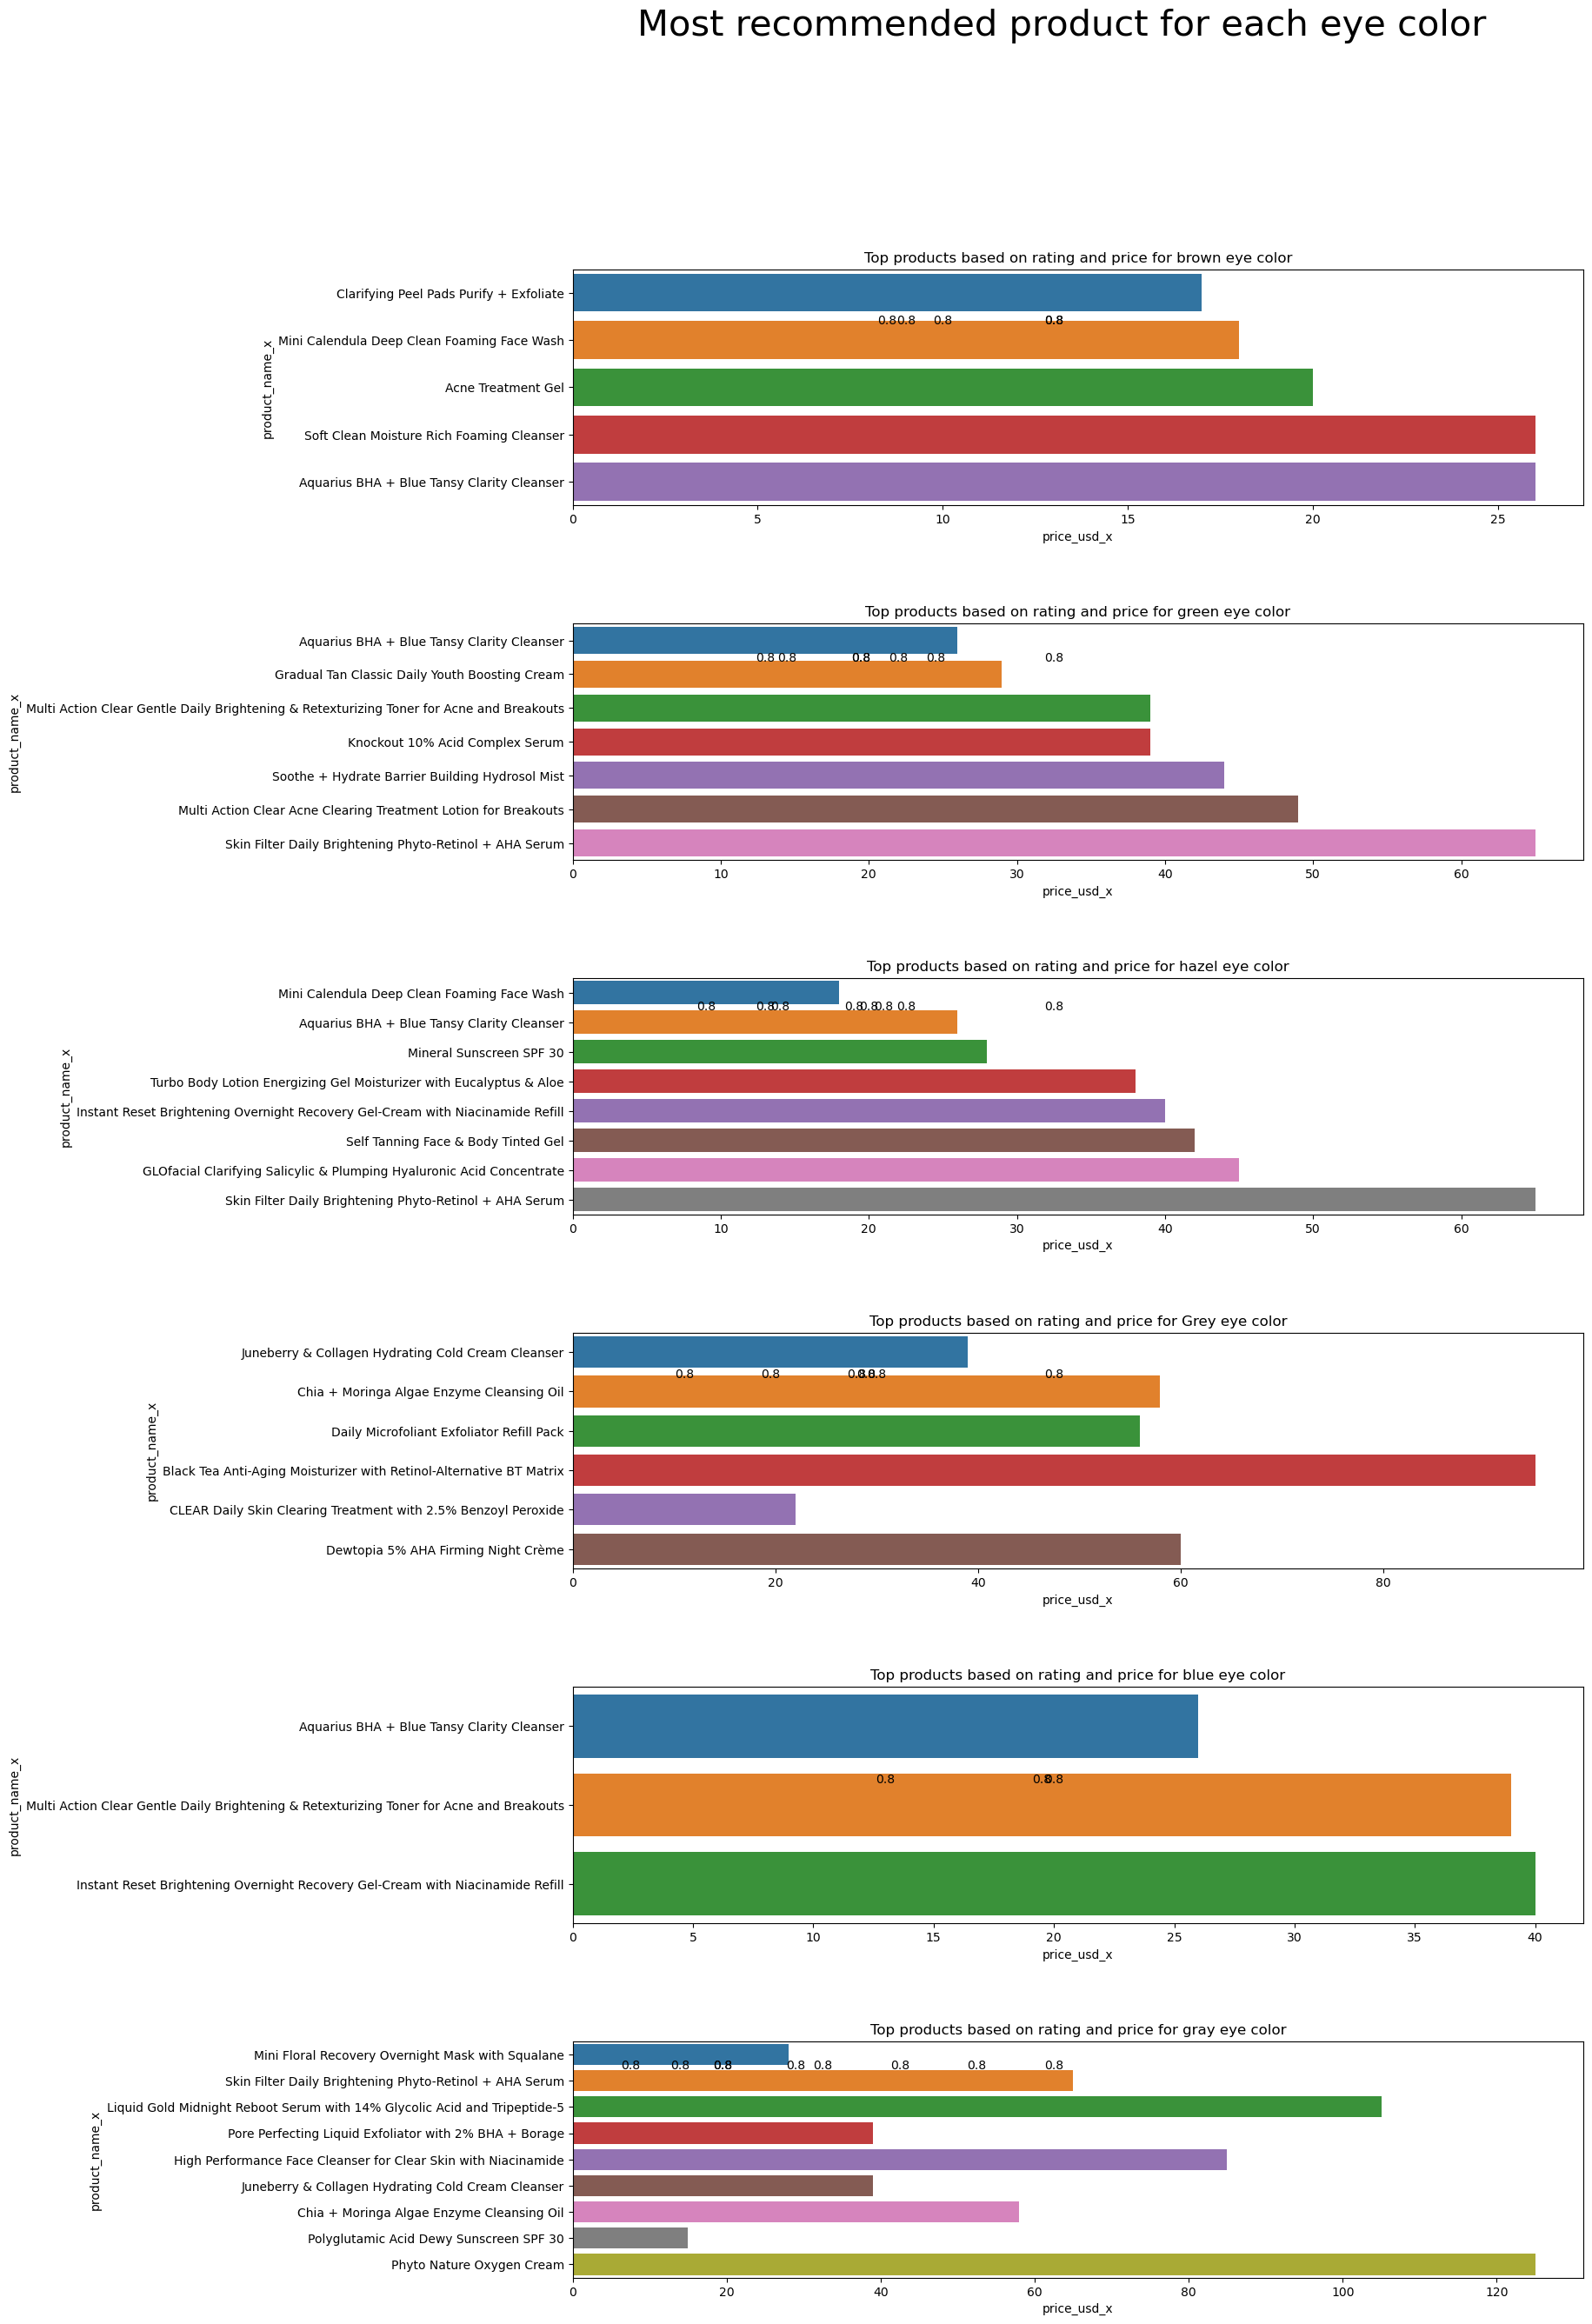

In [57]:
eye_color = ['brown',"green", "hazel", "Grey", "blue", "gray" ]
plot_top_products_by_eye_color(new_data, eye_color)